In [1]:
#Let's import our key libraries here...
#These are the toolboxes that hold the tools to solve our problems
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import scipy.optimize as optimization

**Fun**


Now that you're familiar with having fun with functions and making a simple plot, you must be wondering: "Forget made up things! What if I already have data and I just want to see it?"
Alright, let's have a look...
Let's say I have a bunch of data and it's saved to a csv...
If you're SOFI_C9 you'll remember our rheology case study (I know, I know, but let's just forget it's rheology and just do it for the plot xD)
I have indeed uploaded a full project's worth of work, so if you do want to see the original rushed code - in which I did not use pandas, like a baffoon - then feel free to browse the Rheology Plots file. Otherwise, let's do this step by step.

Ok, I lied... These csv files don't have column titles. So let's just write that in here so we don't forget those.

DataLabel	Shear Rate	Shear Stress	Shear Strain	Viscosity	Normal Force	Torque

[] [1/s]	[Pa]	[%]	[mPa·s]	[N]	[mN·m]

Ans then when we load them we chuck these in nicely:)

Back to it then. Let's load our files

In [86]:
head=["Label", "Rate (1/s)", "Stress (Pa)", "Strain (%)", "Viscosity (mPas)", "NForce (N)", "Torque (mNm)"]
df = pd.read_csv("../ACS2/GR4SM28.csv",delimiter='\t', header=None, names=head, encoding="UTF-16")
df

Label  Rate (1/s)  Stress (Pa)  Strain (%)  Viscosity (mPas)  NForce (N)  \
NaN      1       0.100     73.97500       225.0       739780.0000        0.04   
NaN      2       0.158     75.68300       657.0       477520.0000        0.02   
NaN      3       0.251     77.76700      1340.0       309590.0000        0.02   
NaN      4       0.398     80.42900      2420.0       202020.0000        0.03   
NaN      5       0.631     83.71900      4140.0       132680.0000        0.03   
NaN      6       1.000     87.53000      6870.0        87528.0000        0.03   
NaN      7       1.580     92.09900     11200.0        58109.0000        0.04   
NaN      8       2.510     97.88500     18000.0        38968.0000        0.05   
NaN      9       3.980    105.24000     28900.0        26435.0000        0.05   
NaN     10       6.310    114.47000     46000.0        18153.0000        0.06   
NaN     11      10.000    126.62000     73200.0        12662.0000        0.07   
NaN     12      15.800    142.44000    116000.0         8987.2000        0.08   
NaN     13      25.100    163.18000    185000.0         6496.5000        0.10   
NaN     14      39.800    189.99000    293000.0         4772.5000        0.12   
NaN     15      63.100    222.29000    465000.0         3523.2000        0.16   
NaN     16     100.000    237.65000    737000.0         2376.5000        0.20   
NaN      1     100.000    237.92000   1040000.0         2379.5000        0.20   
NaN      2      63.100    214.32000   1250000.0         3396.6000        0.14   
NaN      3      39.800    179.02000   1390000.0         4496.7000        0.10   
NaN      4      25.100    151.52000   1480000.0         6031.9000        0.07   
NaN      5      15.800    130.80000   1530000.0         8252.6000        0.05   
NaN      6      10.000    115.40000   1570000.0        11540.0000        0.03   
NaN      7       6.310    104.01000   1590000.0        16485.0000        0.03   
NaN      8       3.980     95.61900   1600000.0        24018.0000        0.02   
NaN      9       2.510     89.45500   1610000.0        35612.0000        0.01   
NaN     10       1.580     85.04700   1620000.0        53660.0000        0.01   
NaN     11       1.000     81.57900   1620000.0        81579.0000        0.01   
NaN     12       0.631     79.17900   1620000.0       125490.0000        0.01   
NaN     13       0.398     77.19800   1620000.0       193910.0000        0.00   
NaN     14       0.251     75.40100   1620000.0       300170.0000       -0.01   
NaN     15       0.158     73.61400   1620000.0       464470.0000       -0.02   
NaN     16       0.100     71.51500   1630000.0       715140.0000       -0.03   
NaN      1      50.000    194.96000   1740000.0         3900.2000        0.11   
NaN      2      61.100    209.36000   1910000.0         3429.2000        0.13   
NaN      3      74.500    225.77000   2130000.0         3028.5000        0.15   
NaN      4      91.000    237.89000   2390000.0         2613.4000        0.18   
NaN      5     111.000    227.49000   2700000.0         2046.7000        0.19   
NaN      6     136.000    142.50000   3090000.0         1049.9000        0.14   
NaN      7     166.000     93.33700   3570000.0          563.2000        0.11   
NaN      8     202.000     65.78800   4150000.0          325.1000        0.09   
NaN      9     247.000     45.00800   4860000.0          182.1600        0.06   
NaN     10     302.000     18.12300   5720000.0           60.0670        0.03   
NaN     11     368.000      9.13290   6780000.0           24.7900        0.01   
NaN     12     450.000      5.28090   8060000.0           11.7390        0.00   
NaN     13     549.000      3.13140   9640000.0            5.7008        0.00   
NaN     14     671.000      1.36990  11600000.0            2.0425       -0.01   
NaN     15     819.000      0.82366  13900000.0            1.0057       -0.01   
NaN     16    1000.000      2.82320  16800000.0            2.8232       -0.01   

     Torque (mNm)  
NaN      1.3916

Let it be known, especially in Windows, filenames, filetypes, file paths... They are all weird and wacky. My suggestion in windows is not to do what is here but to keep both your files and the jupyter notebook in the same directory if possible. If you are using more than one directory for anything data oriented, please just do yourself a favour and use linux. If not then you  can use the same commands as you would in bash to move around directories but... well it's ugly, very ugly. Anyway.

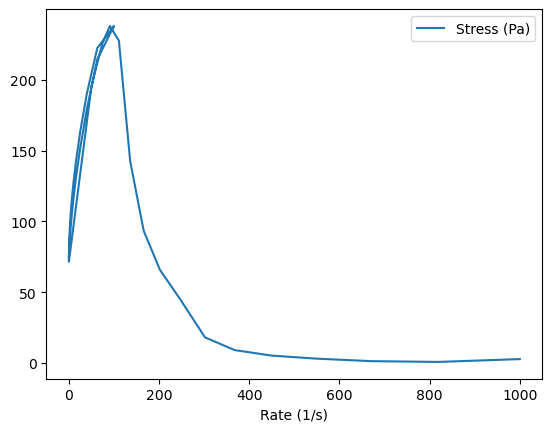

In [90]:
df.plot('Rate (1/s)','Stress (Pa)')
plt.show() #pandas still leverage matplotlib so we must show() to get anything saved down the line

That's nice. We can now see our data. But how do I do anything more fun with it?

Firstly... We want to see the loading, unloading and reloading steps don't we? - I can't remember which was which and I'm not in the mood to figure it out, nor decipher it from my previous, shoddy, code.

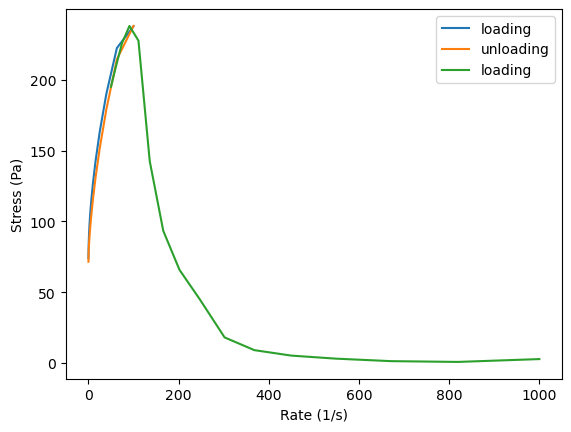

In [91]:
#We know that the machine took 16 measurements per run, so we split our dataframe up and plot each one separately
#Initially, though, we set an axis equal to the object that is generated by the .plot() call
#This is so that we can, in a sense, append this object with our consequent plots :)
#We also change the label of each of these objects such that the legend changes for us too:)
ax1=df.iloc[0:16].plot('Rate (1/s)','Stress (Pa)',label='loading')
df.iloc[16:32].plot('Rate (1/s)','Stress (Pa)',ax=ax1,label='unloading')
df.iloc[32:].plot('Rate (1/s)','Stress (Pa)',ax=ax1,label='loading')
ax1.set_ylabel('Stress (Pa)')
plt.show()

Oh but we should do a log plot!
...Fine

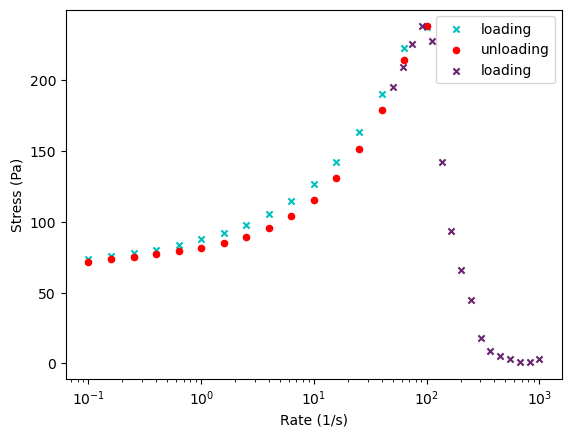

In [100]:
#Simply set logx=True. We can also do this for logy=True, if we so desired. Isn't Python fun?
#I also want to change the colour of the lines for fun
#Also, aslo, it should be a scatter plot shouldn't it? Let's change the kind and while we're at it we can change the marker
#We can do loads to markers: size, transparency, colour. LOADS. Have a look at the documentation for more info. 
#Top tip: Just google it or ask an AI
palatinate='#68246D'
ax1=df.iloc[0:16].plot('Rate (1/s)','Stress (Pa)',label='loading',logx=True,color='c', kind='scatter',marker='x')
df.iloc[16:32].plot('Rate (1/s)','Stress (Pa)',ax=ax1,label='unloading',logx=True,color='r', kind='scatter',marker='o')
df.iloc[32:].plot('Rate (1/s)','Stress (Pa)',ax=ax1,label='loading',logx=True,color=palatinate, kind='scatter',marker='x')
ax1.set_ylabel('Stress (Pa)')
plt.show()

Let's put it all together here


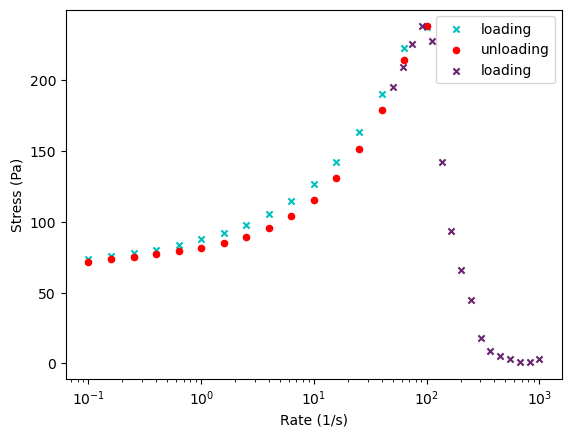

In [103]:
#Let's put the above all together:
head=["Label", "Rate (1/s)", "Stress (Pa)", "Strain (%)", "Viscosity (mPas)", "NForce (N)", "Torque (mNm)"]
df = pd.read_csv("../ACS2/GR4SM28.csv",delimiter='\t', header=None, names=head, encoding="UTF-16")
palatinate='#68246D'
ax1=df.iloc[0:16].plot('Rate (1/s)','Stress (Pa)',label='loading',logx=True,color='c', kind='scatter',marker='x')
df.iloc[16:32].plot('Rate (1/s)','Stress (Pa)',ax=ax1,label='unloading',logx=True,color='r', kind='scatter',marker='o')
df.iloc[32:].plot('Rate (1/s)','Stress (Pa)',ax=ax1,label='loading',logx=True,color=palatinate, kind='scatter',marker='x')
ax1.set_ylabel('Stress (Pa)')
plt.show()


Notice how if we change the file, it does the exact same thing? Interesting. It would be cool to do this for all our files, but it seems a bit tedious to write it out again and again right? Let's make all of the above into one simple line and see how it goes?

In [208]:
#Recall functions...
#I can make a function once and then call it again with just a few arguments and get the desired result!
#We want our function to take in a file and show us its graph. We should actually add a title so we know which is which too...
#Also, I split it into 2 functions for a reason - not being uh ztubid
def load(file):
    head=["Label", "Rate (1/s)", "Stress (Pa)", "Strain (%)", "Viscosity (mPas)", "NForce (N)", "Torque (mNm)"]
    df = pd.read_csv(file,delimiter='\t', header=None, names=head, encoding="UTF-16")
    #print(df)#unhash this for your sanity checks, and hash it back when you want somehting clean... but don't delete it!
    return df
def plotcsv(file,show=True):
    df=load(file)
    palatinate='#68246D'
    ax1=df.iloc[0:16].plot('Rate (1/s)','Stress (Pa)',label='loading',logx=True,color='c', kind='scatter',marker='x')
    df.iloc[16:32].plot('Rate (1/s)','Stress (Pa)',ax=ax1,label='unloading',logx=True,color='r', kind='scatter',marker='o')
    df.iloc[32:].plot('Rate (1/s)','Stress (Pa)',ax=ax1,label='loading',logx=True,color=palatinate, kind='scatter',marker='x')
    ax1.set_ylabel('Stress (Pa)')
    ax1.set_title(file) #This should set the title to the filename. I won't overcomplicate it but you should try messing around with string slicing. Look it up :)
    if show:
        plt.show()

##Notice, SHIFT + Enter and nothing happens. We've made a nice little function

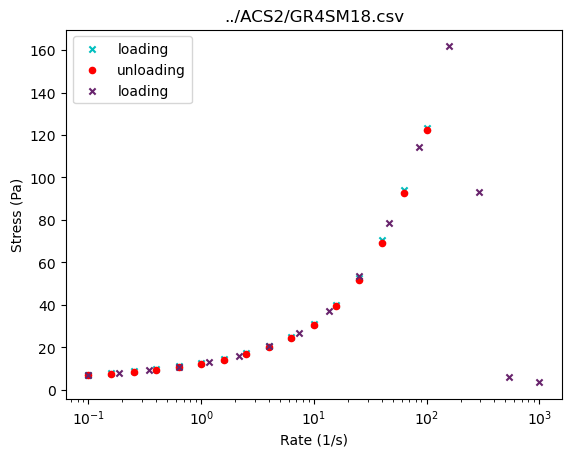

In [209]:
#Sanity check ... Does our function work for one file?
#I'll write it in a particular way first...
files=['../ACS2/GR4SM18.csv']
for file in files:
    file=file
    plotcsv(file)

Now let's run this function over the files we care about.
Wait... we've got a lot of files...
We have to collect the files we need in an array. We can manually chuck them in, again see my brute force code from before, but when you've got hundreds of files it's just not feasible





In [210]:
#I'm being a bit naughty importing these down here but we don't use these libraries anywhere else so it's okay.
#In fact, I would say that if you are cleaning code up or yo ualready know whwere you need libraries, then it's better to
#introduce them where you use them. But I'm sure I've annoyed CSers with that sentence
import os
from os import walk
my_current_directory=os.path.abspath(".")
print(my_current_directory)
correction="/../ACS2/"
directory_my_files_are_in=my_current_directory+correction
print(directory_my_files_are_in)
filenames = next(walk(directory_my_files_are_in), (None, None, []))[2]  # [] if no file
print(filenames)
#So our filenames are here but they're a bit messy because of the files we don't care about and the non-csv ones
#Let's remember that moving forward. We could clean it up now but honestly it doesn't matter and the alternative is easier for me.

C:\Users\Student\Documents\trypy_tutorials\books
C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/
['GR4SM14.csv', 'GR4SM14__1000.csv', 'GR4SM15.csv', 'GR4SM16.csv', 'GR4SM17.csv', 'GR4SM18.csv', 'GR4SM19.csv', 'GR4SM20.csv', 'GR4SM21_FP_13_02.csv', 'GR4SM22_FP_13_02.csv', 'GR4SM26.csv', 'GR4SM26_FP_13_02.csv', 'GR4SM26_FP_50°C_14_02.csv', 'GR4SM26_FP_50°C_Non-cured_14_02.csv', 'GR4SM27.csv', 'GR4SM27_FP_13_02.csv', 'GR4SM28.csv', 'GR4SM29_CH_13_02.csv', 'GR4SM29_FP_13_02.csv', 'GR4SM30_FP_15_02.csv', 'GR4SM32_FP_13_02.csv', 'GR4SM32_FP_50°C_Cured_14_02.csv', 'GR4SM33_FP_14_02.csv', 'Rheology Plots.ipynb', 'table.csv', 'Ternary Plots.ipynb']


That's nice. It seems to work for one boi... Now can it work for them all?

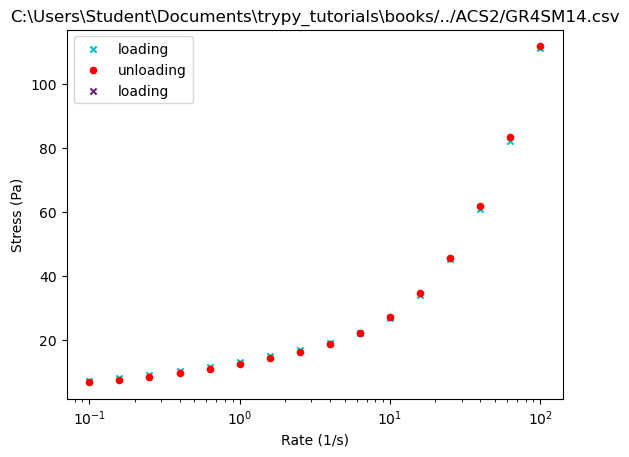

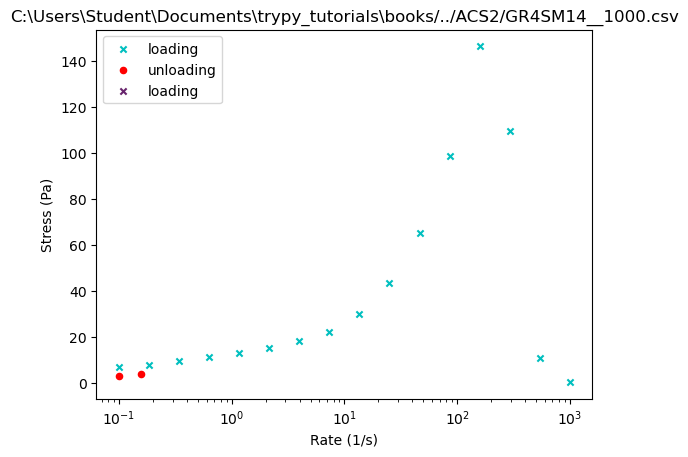

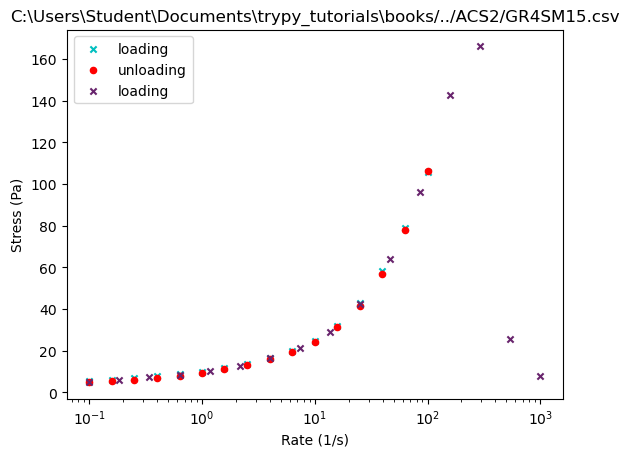

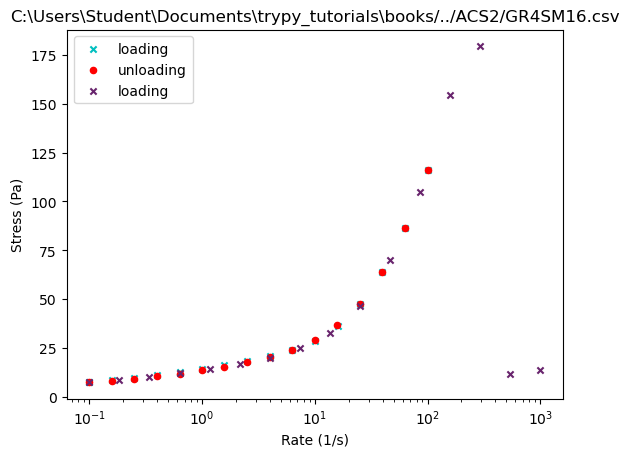

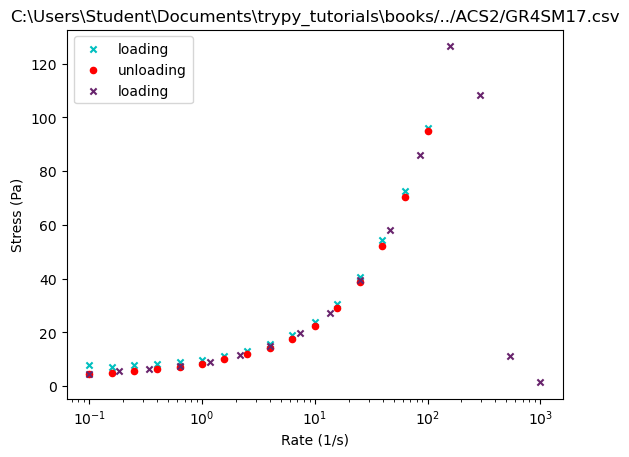

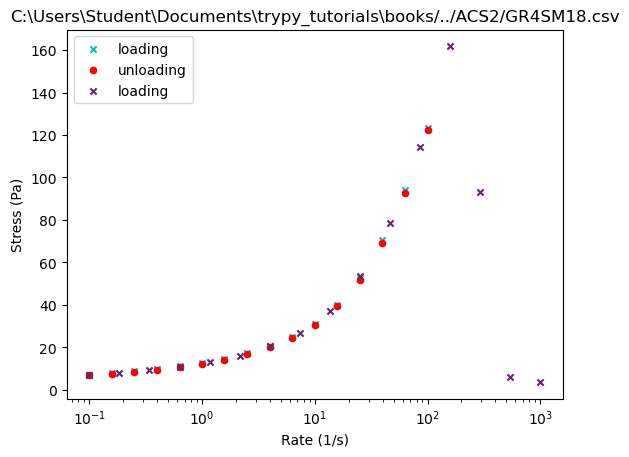

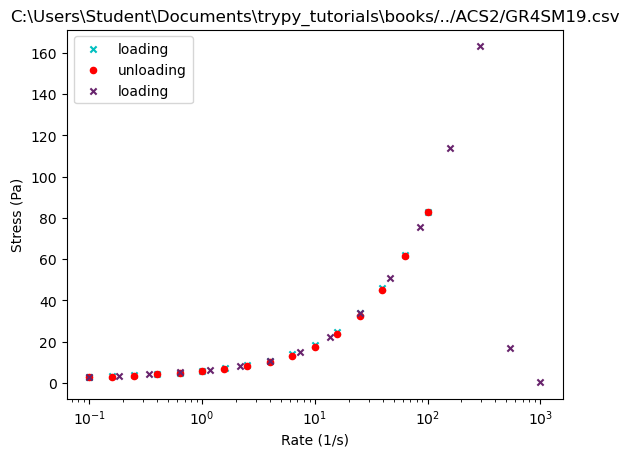

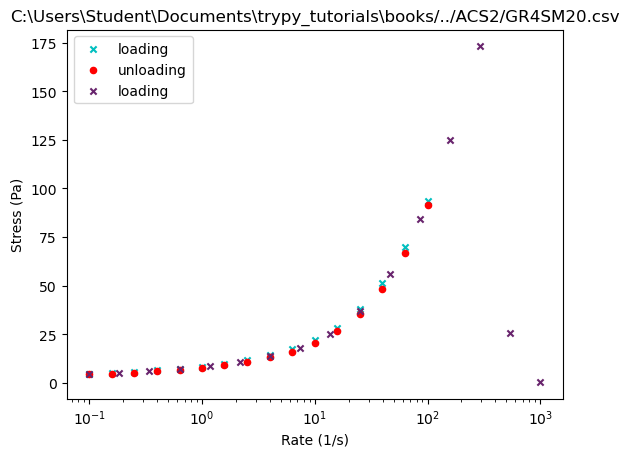

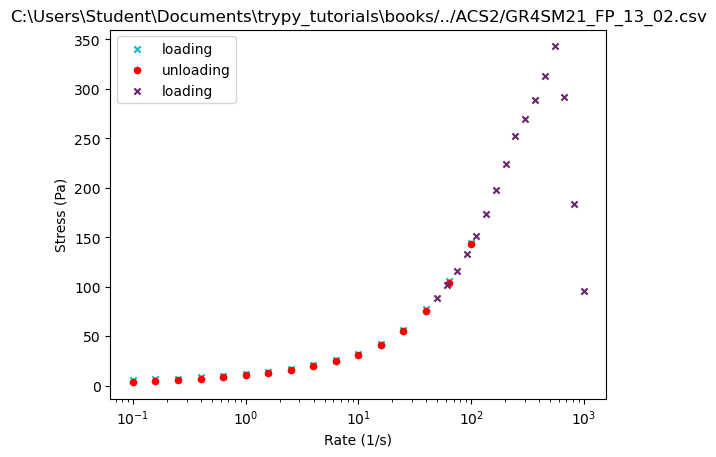

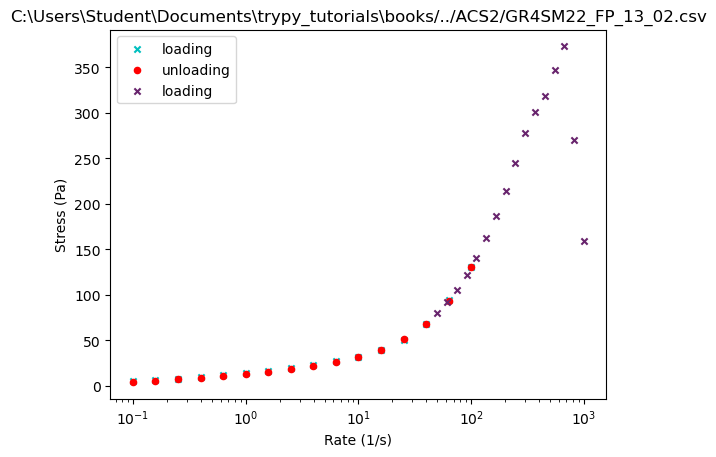

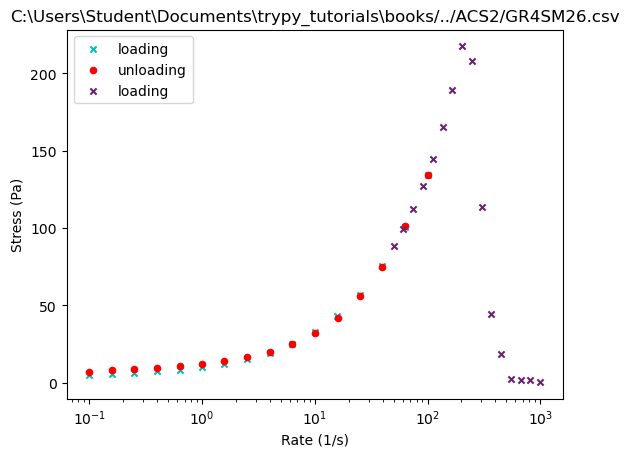

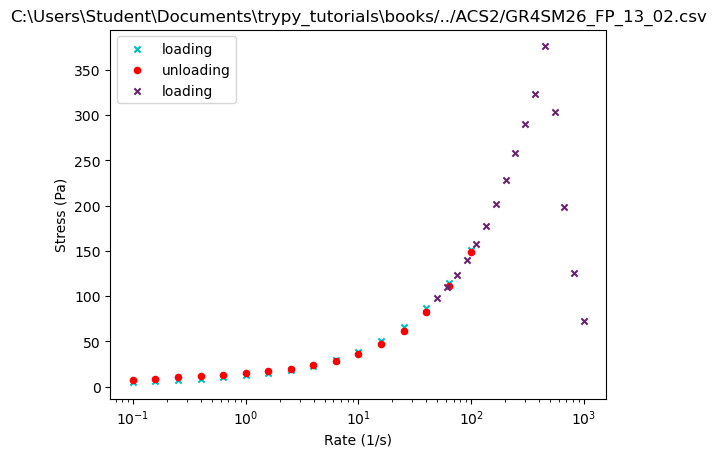

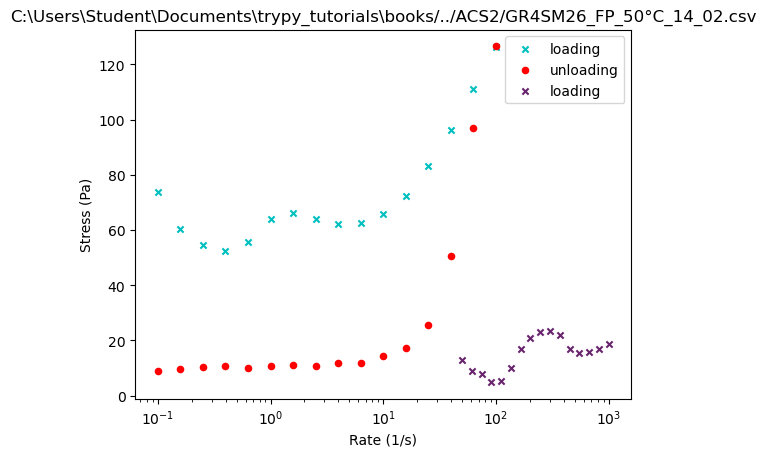

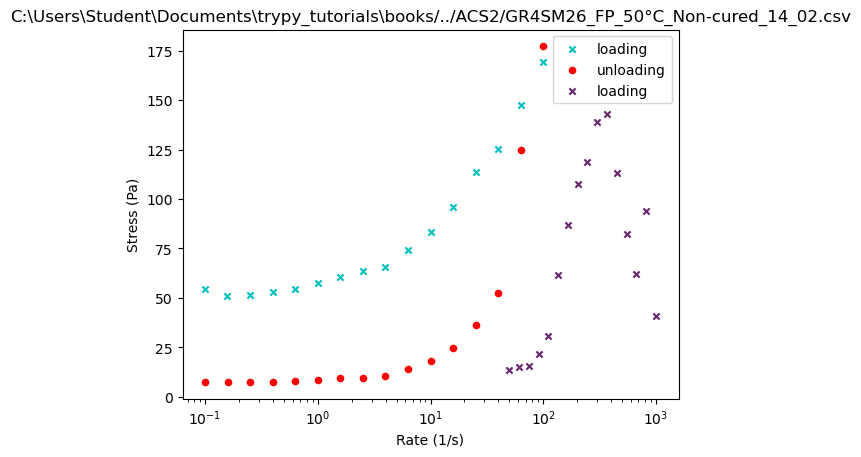

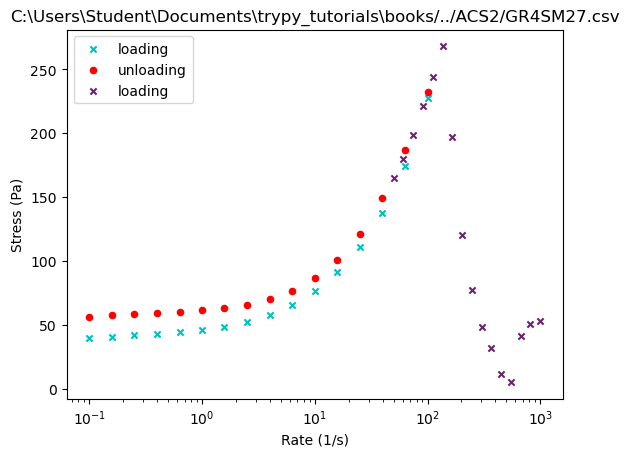

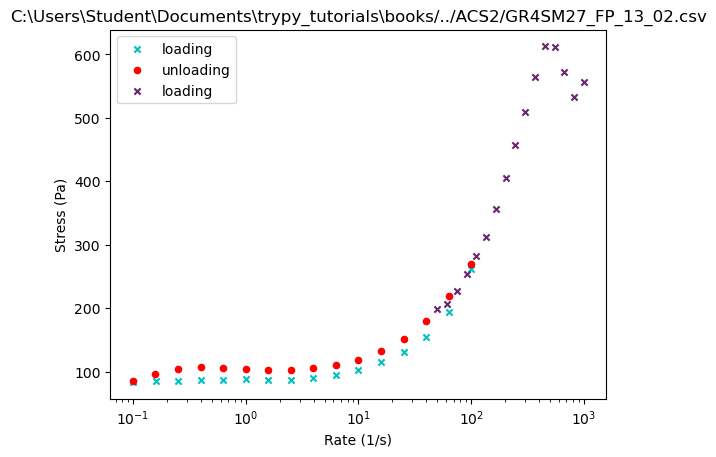

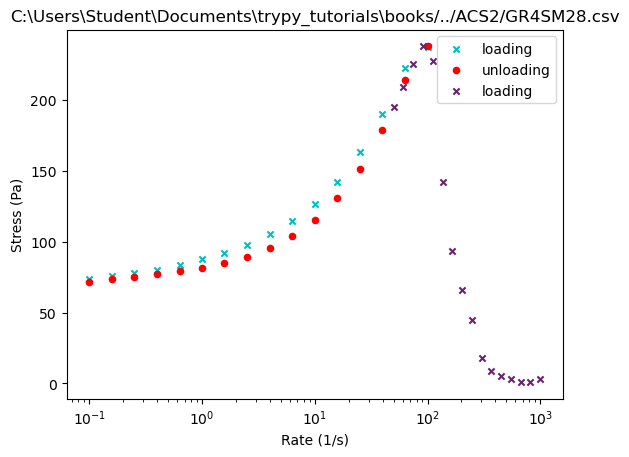

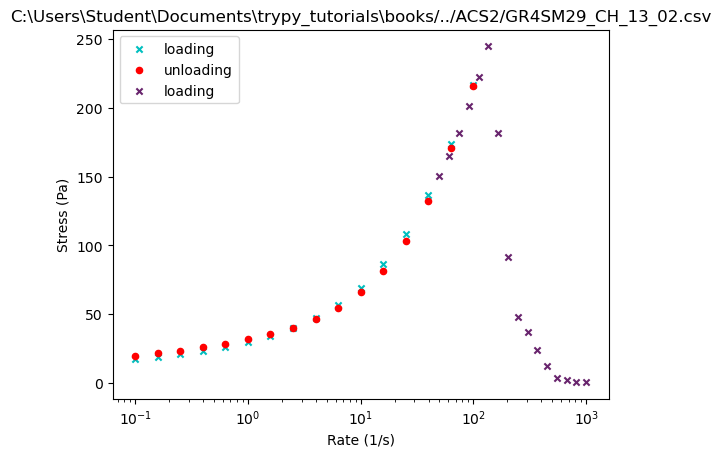

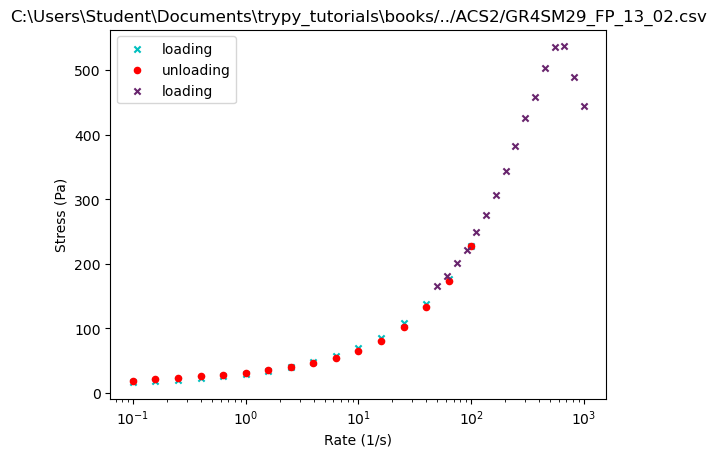

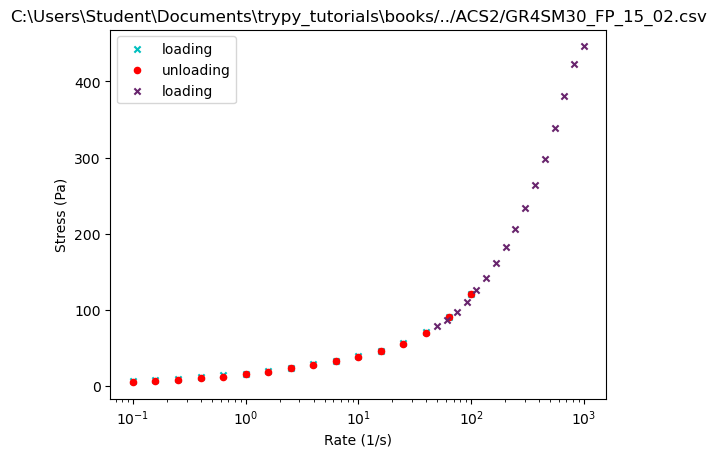

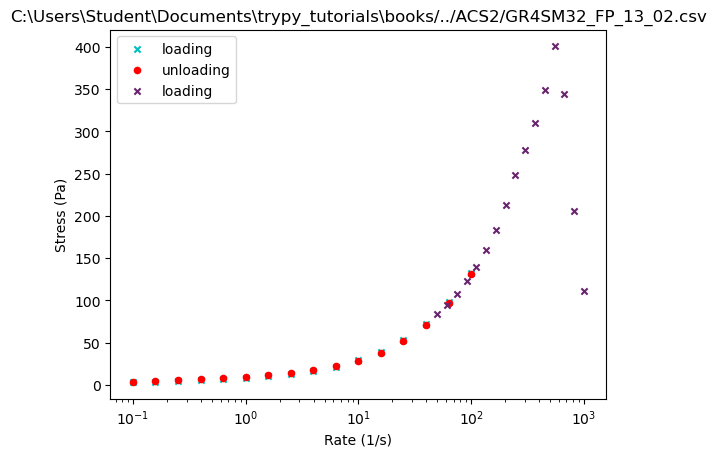

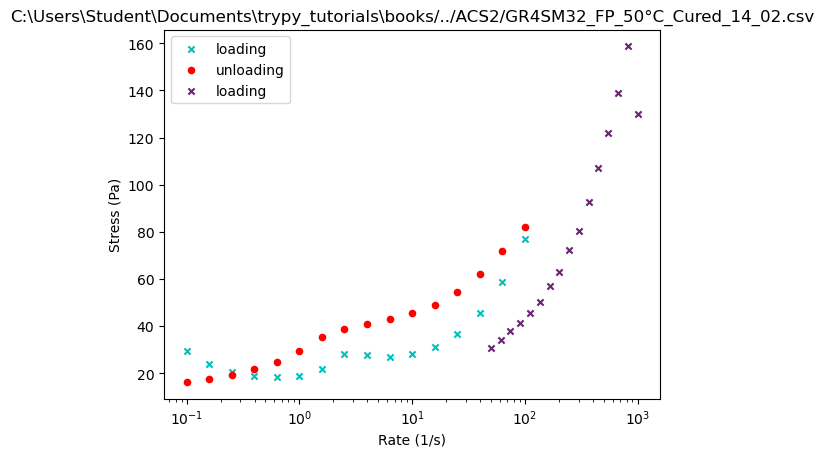

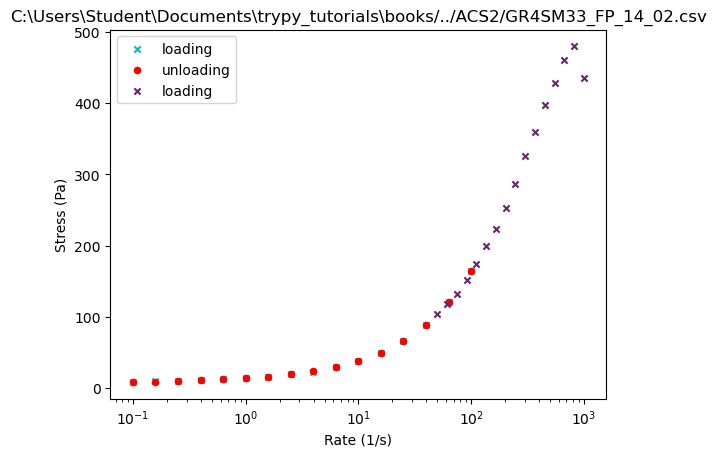

UnicodeError: UTF-16 stream does not start with BOM

In [211]:
for file in filenames:
    file=directory_my_files_are_in+file
    plotcsv(file)
#Sooner or later we will run into an error. This is not our fault. Who am I kidding, it is! 
#Let's fix this by simply ignoring files we don't care about

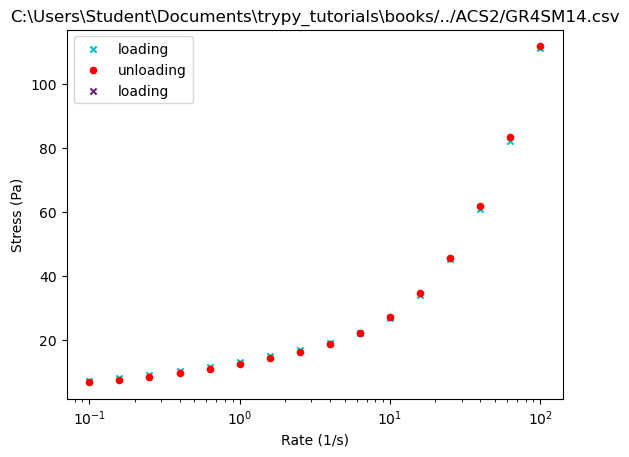

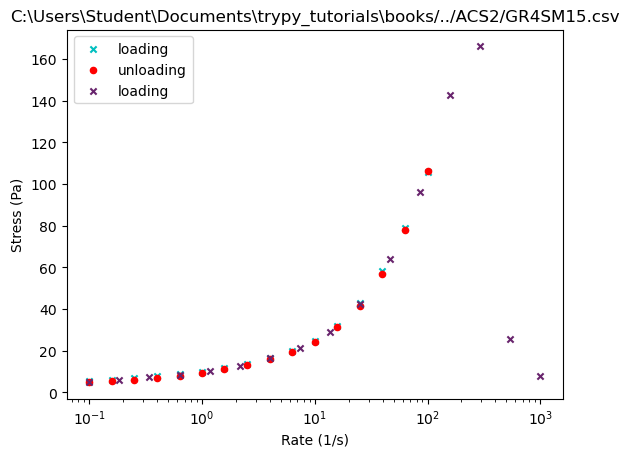

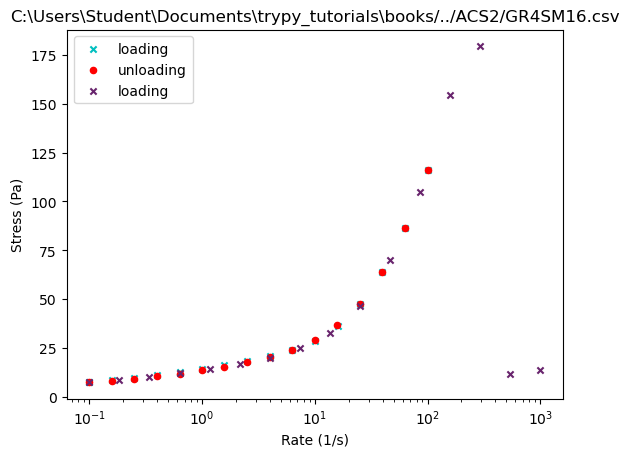

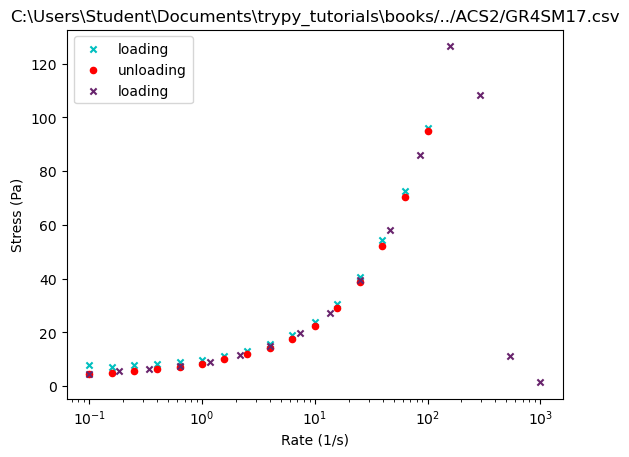

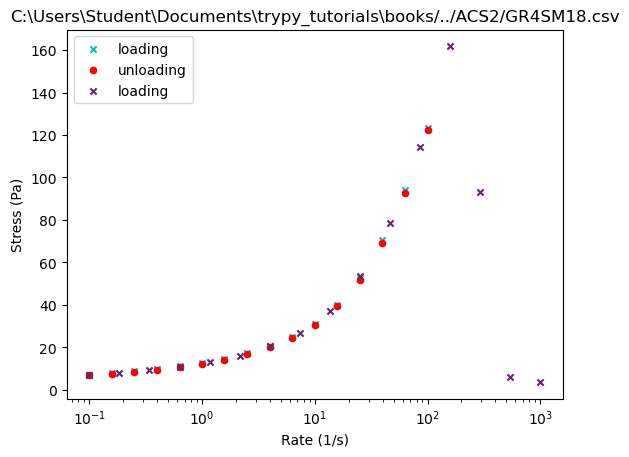

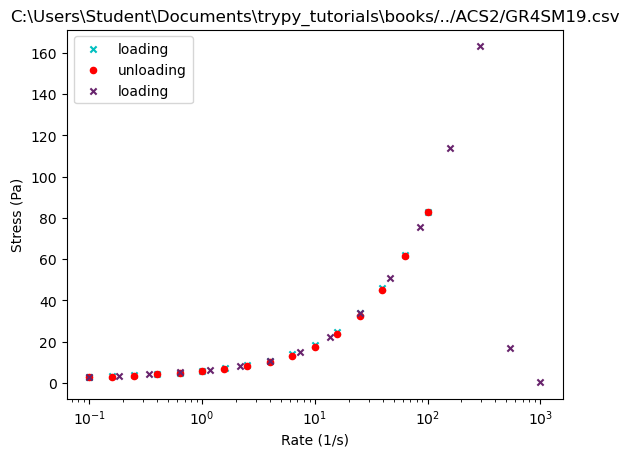

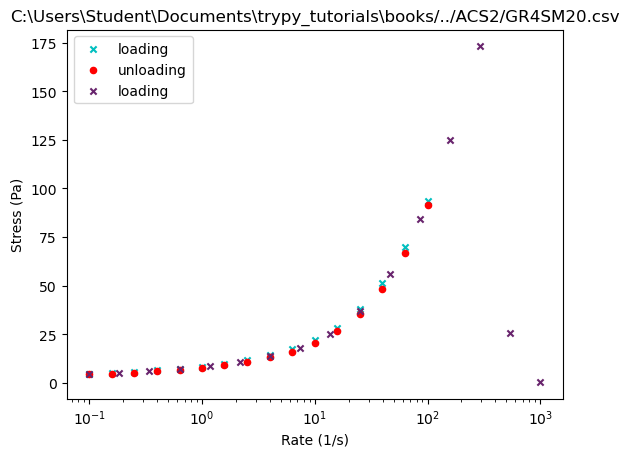

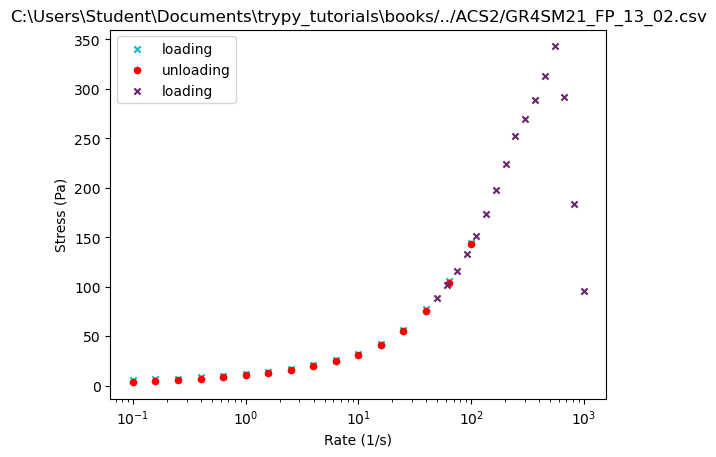

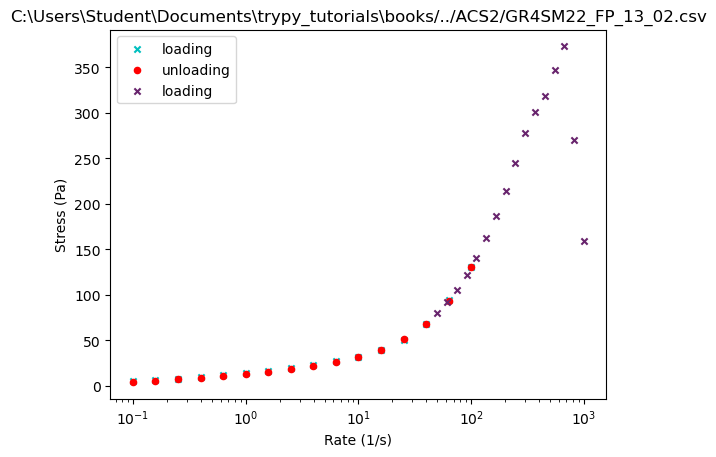

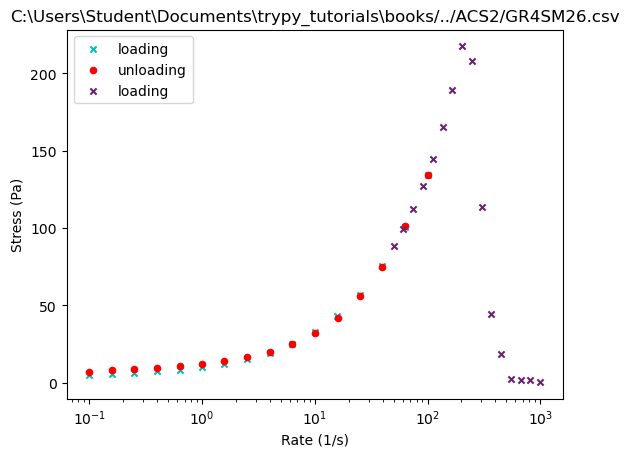

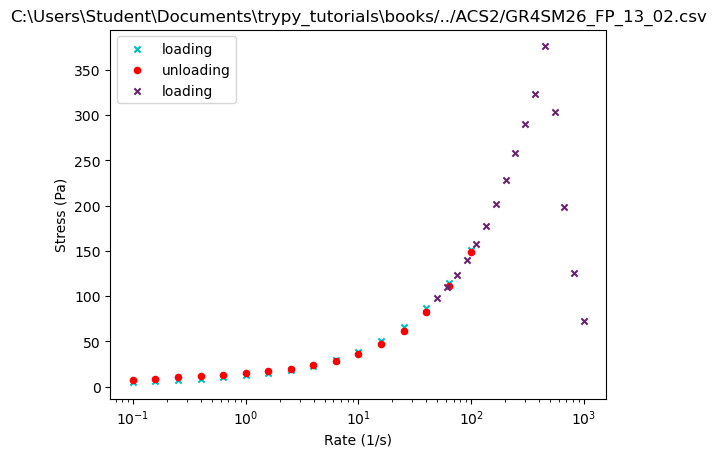

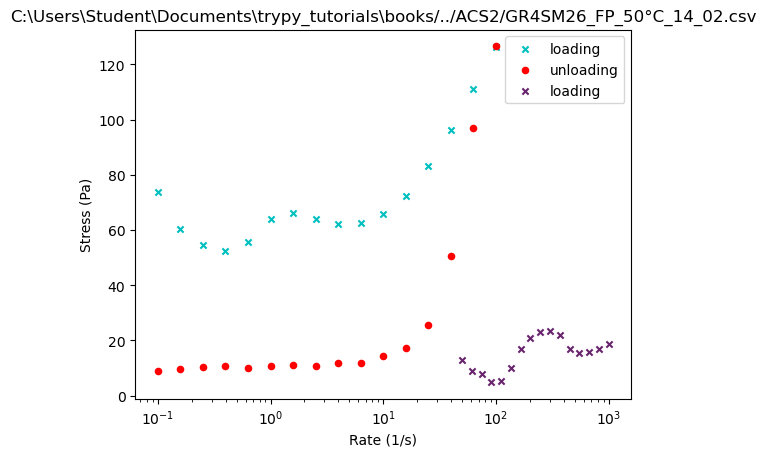

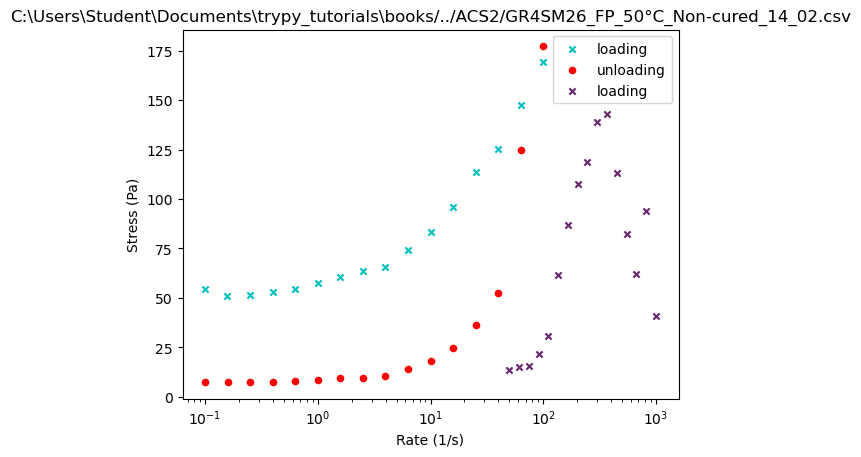

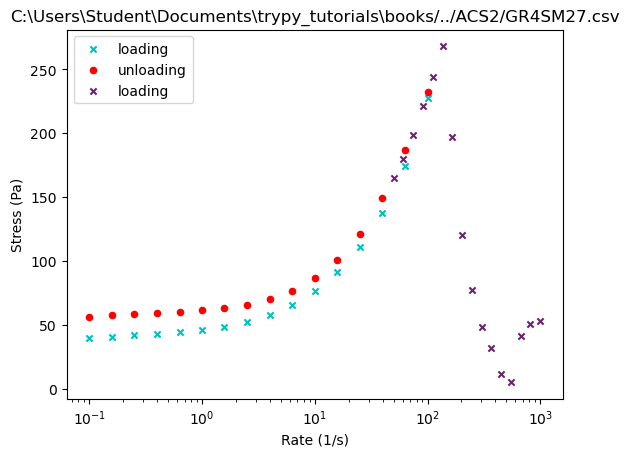

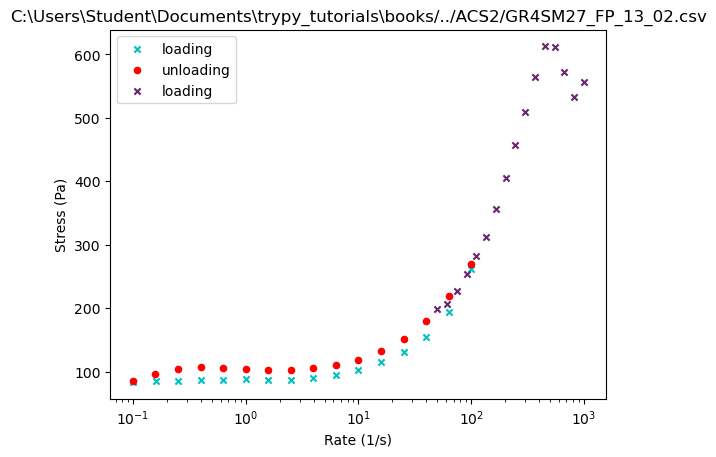

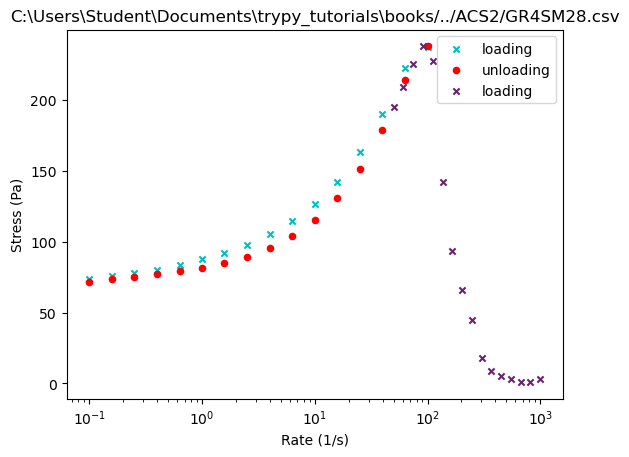

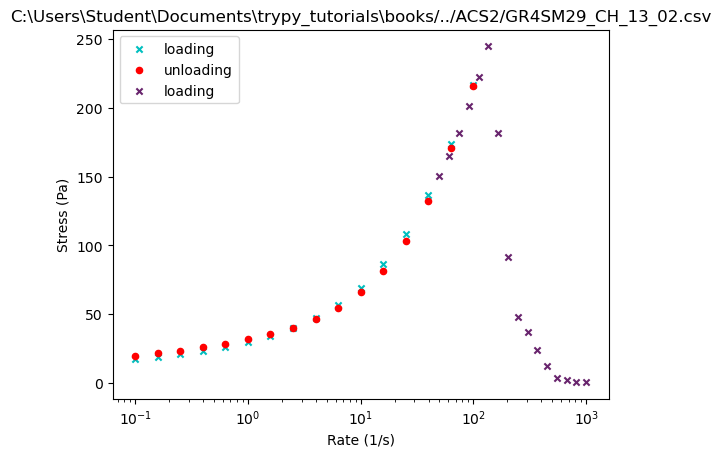

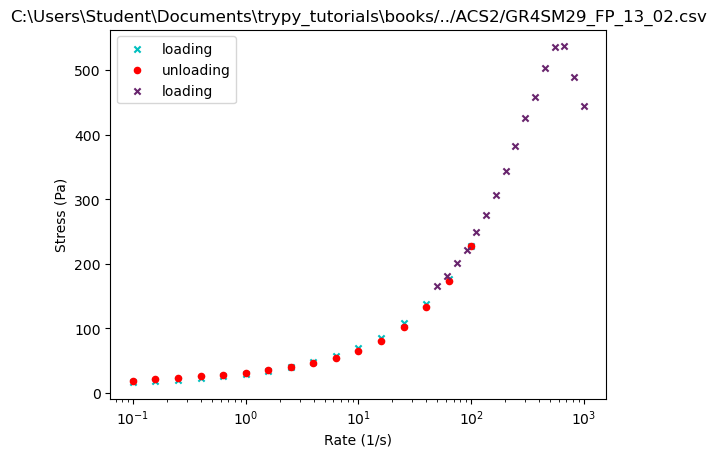

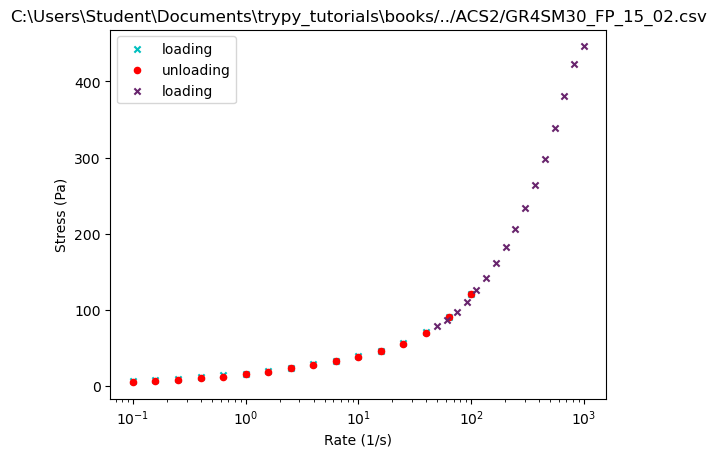

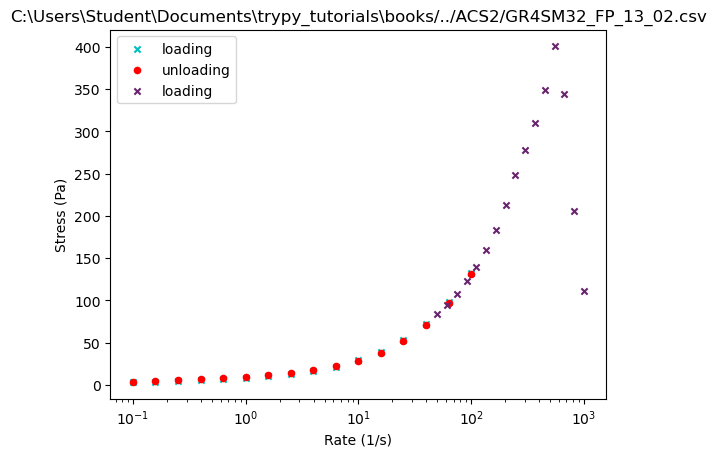

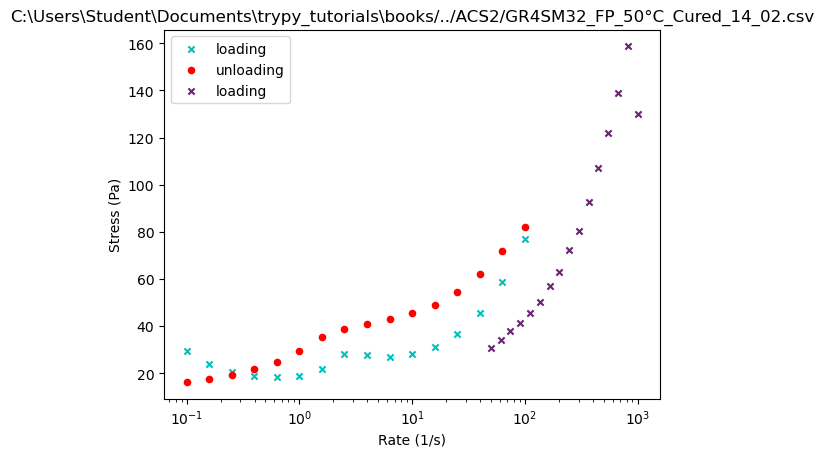

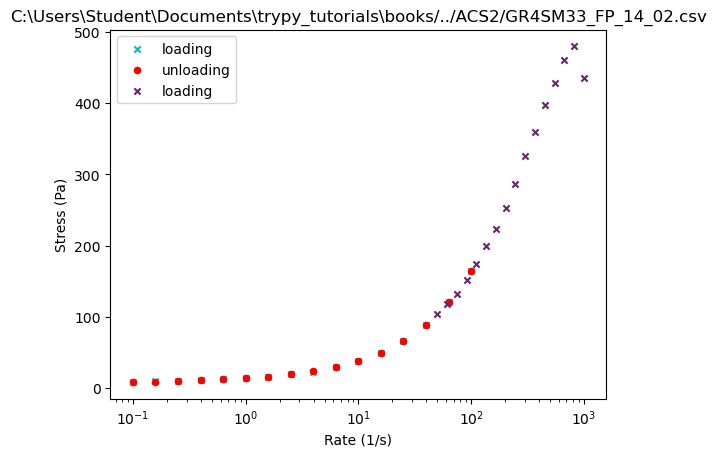

In [212]:
for file in filenames:
    if file[-4:]!='.csv':    #This simple trick says if these conditions are met (last letters in string aren't .csv) 
        continue             #Then we simply continue to the next file, restarting the loop
    if file[0]!='G':         #This one ignores the table file we use in our ternary plot :)
        continue
    if file=='GR4SM14__1000.csv': #Guess what this one does :)
        continue
    file=directory_my_files_are_in+file
    plotcsv(file)
    #print(file)#By the way, don't wait for your function to fail, do if and print checks to make sure your input is correct first

What's nice is, Let's say I just want to do this in one line, I still can. I just turn this into a function too, but with no arguments!
Why, you ask? Well if I want to do some analysis or some quick calculations to print at the beginning or end, or maybe I've got loads of these chunks of code and I just want them all together, it's just very quality of life isn't it?

In [213]:
def run():
    for file in filenames:
        if file[-4:]!='.csv':    #This simple trick says if these conditions are met (last letters in string aren't .csv) 
            continue             #Then we simply continue to the next file, restarting the loop
        if file[0]!='G':         #This one ignores the table file we use in our ternary plot :)
            continue
        if file=='GR4SM14__1000.csv': #Guess what this one does :)
            continue
        file=directory_my_files_are_in+file
        plotcsv(file)
        #print(file)#By the way, don't wait for your function to fail, do if and print checks to make sure your input is correct first

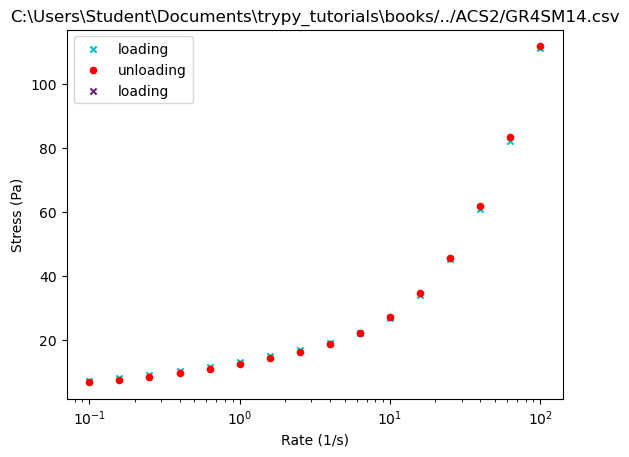

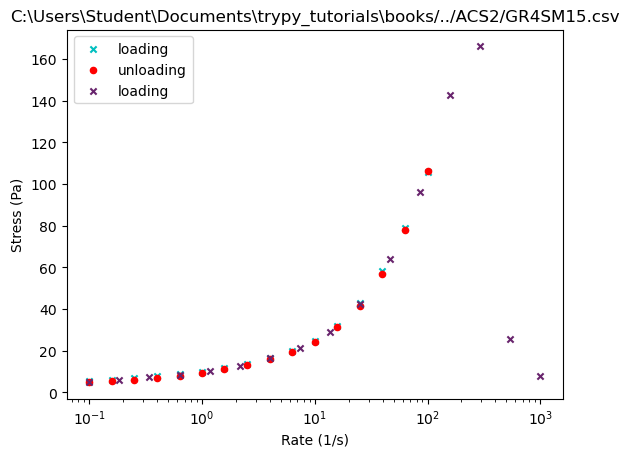

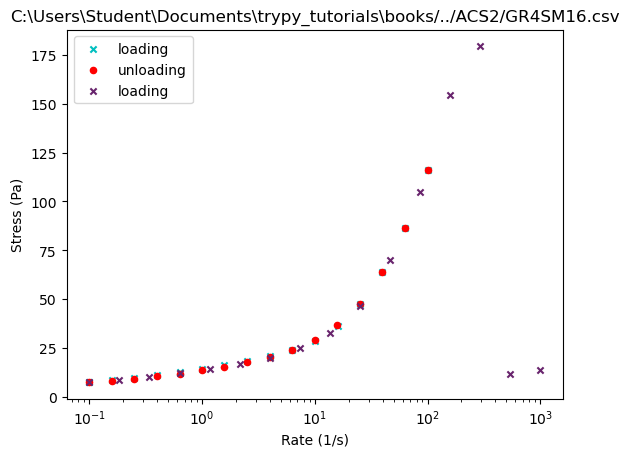

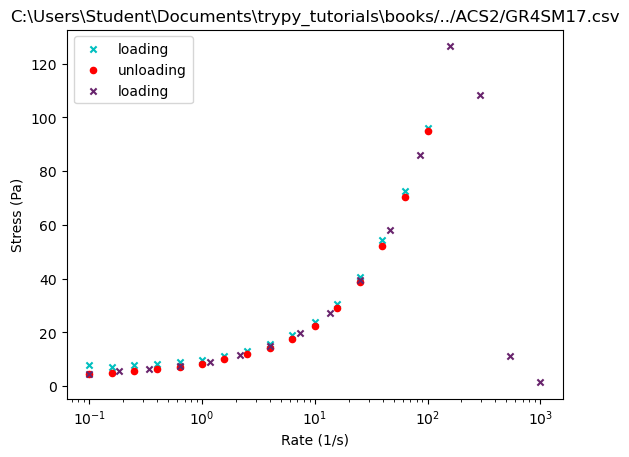

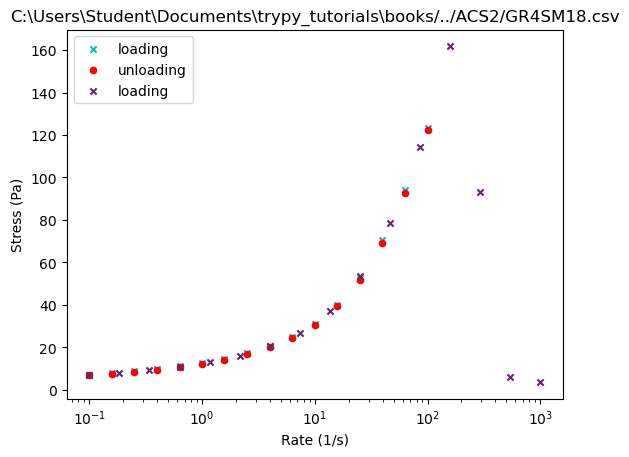

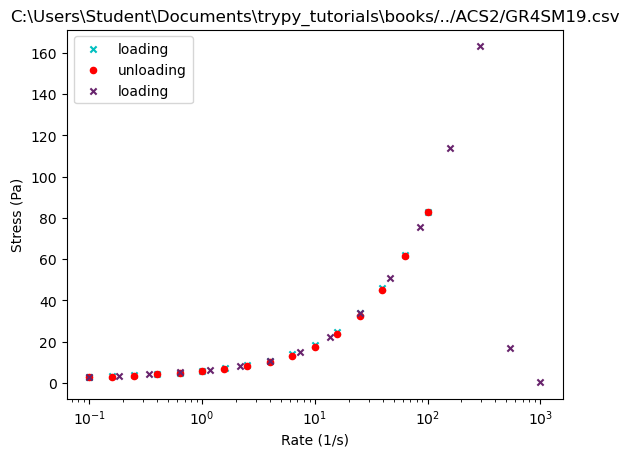

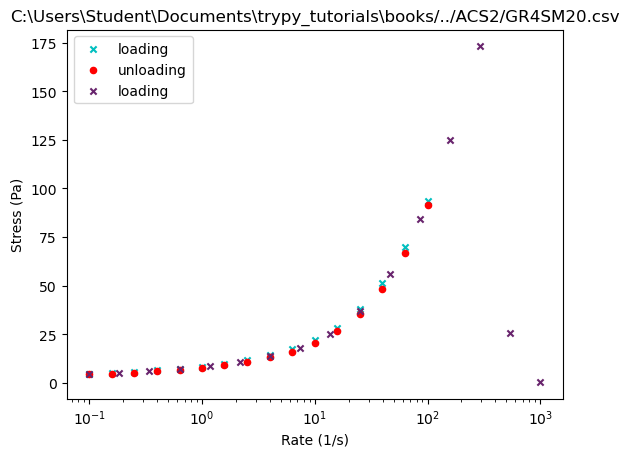

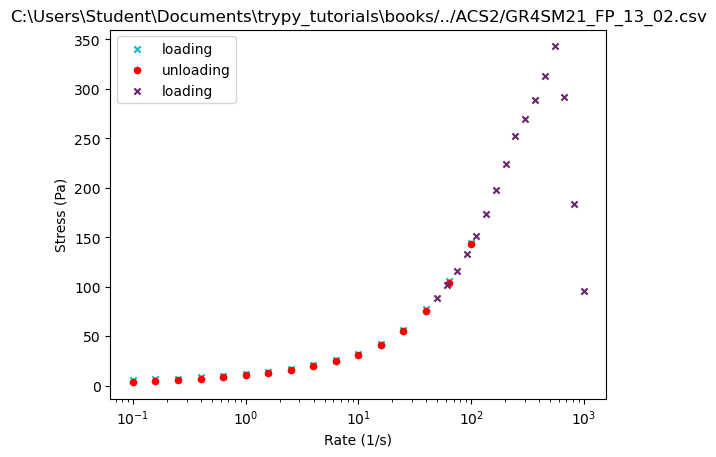

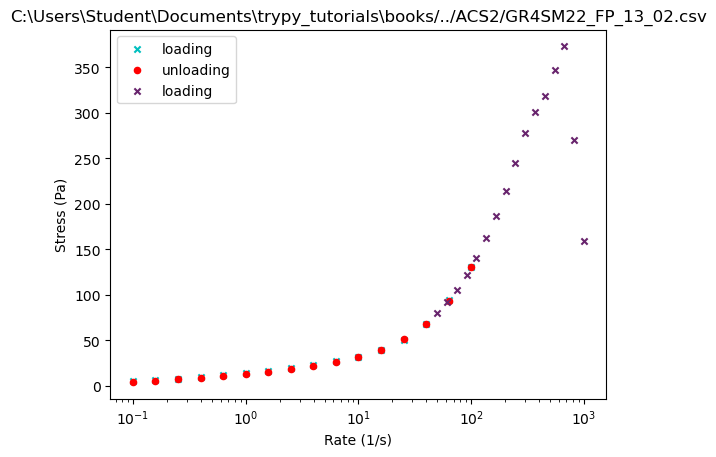

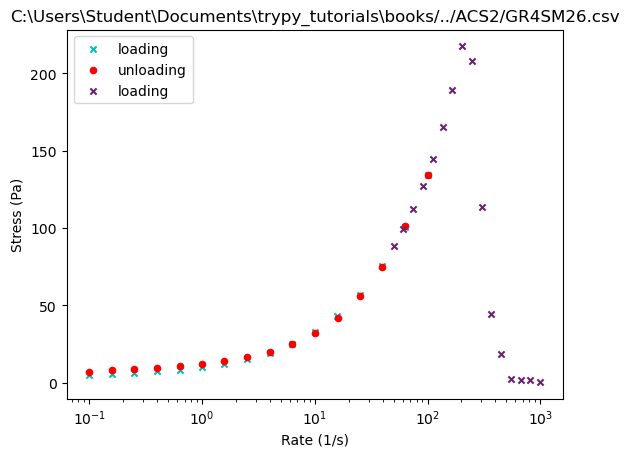

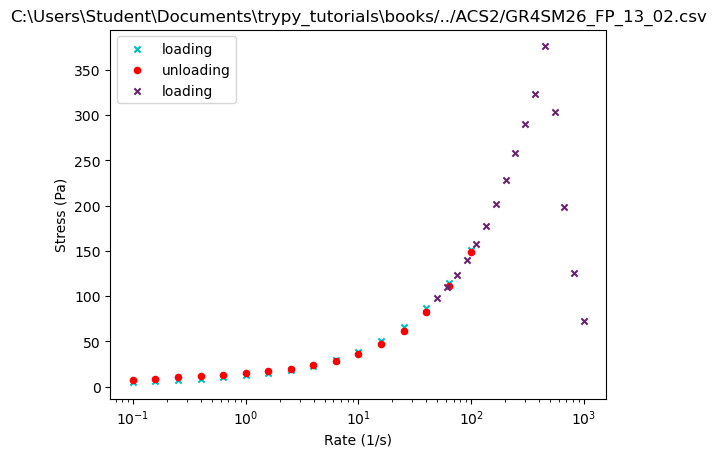

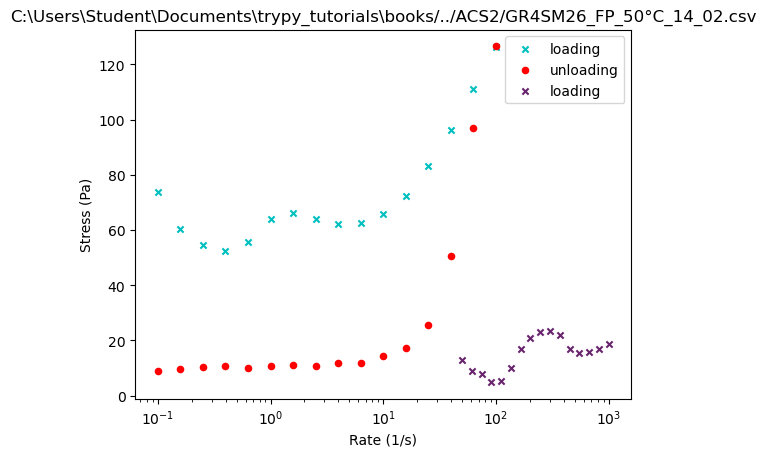

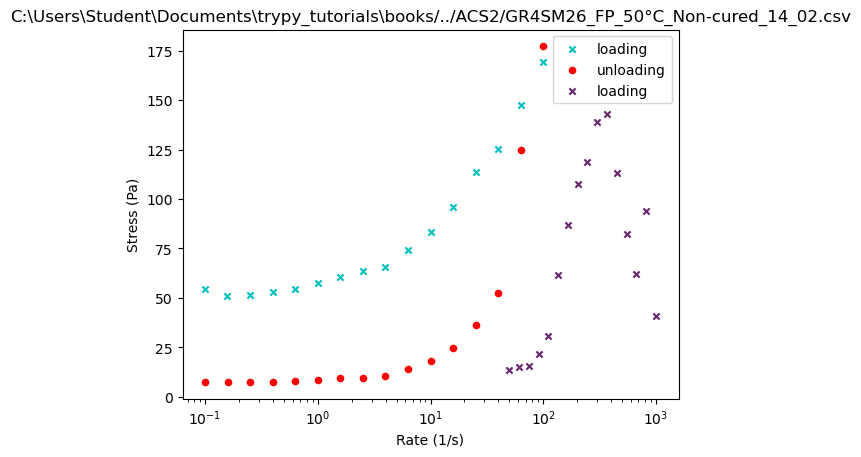

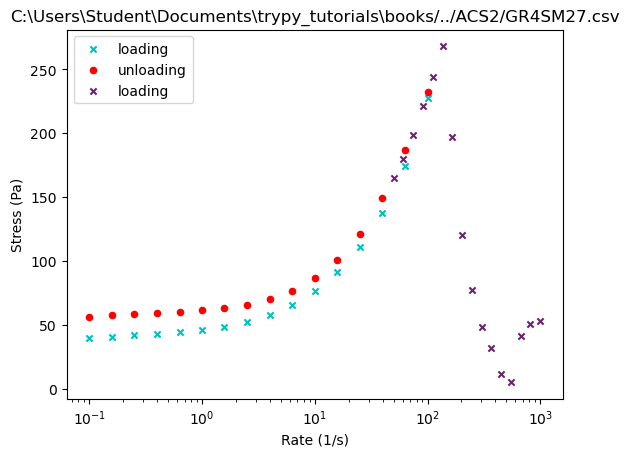

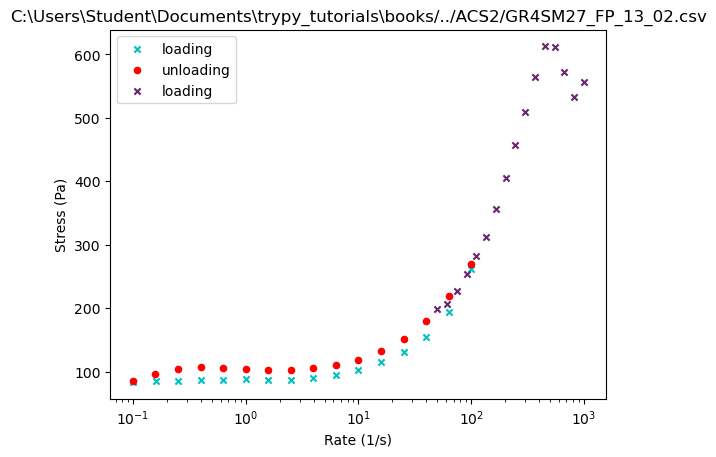

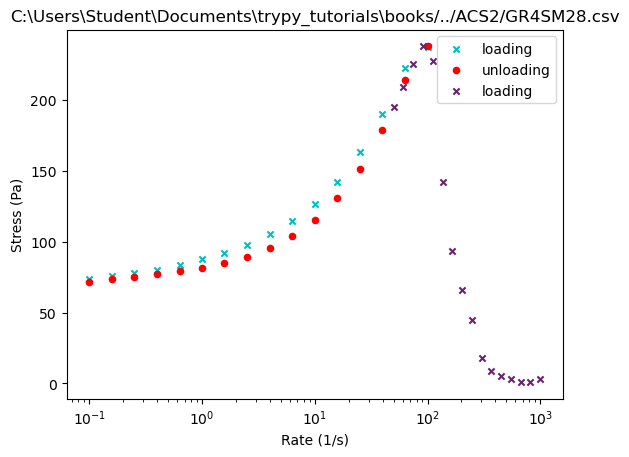

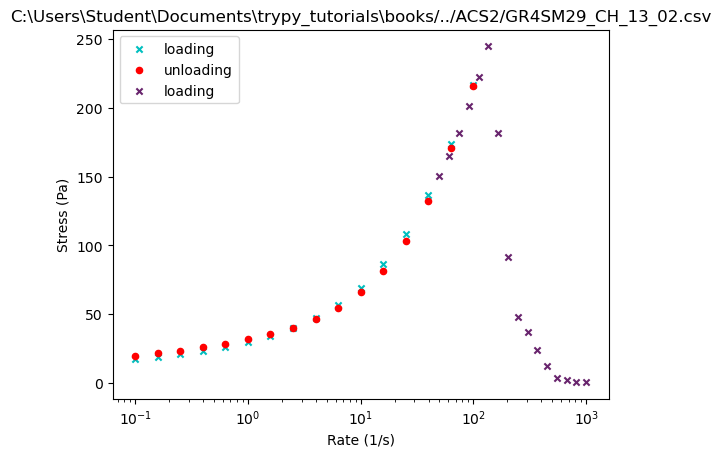

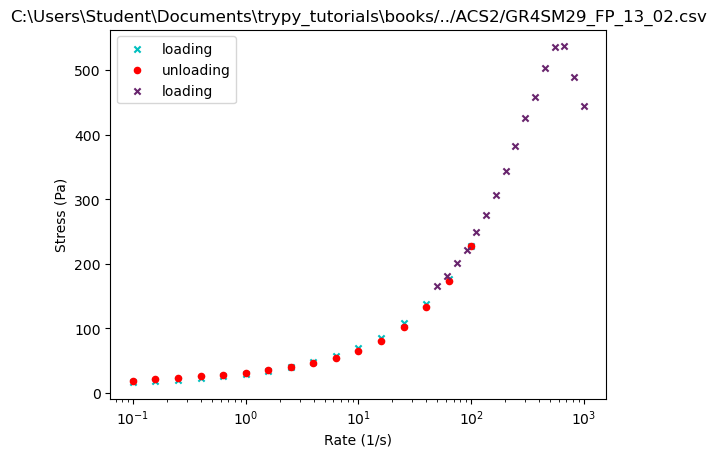

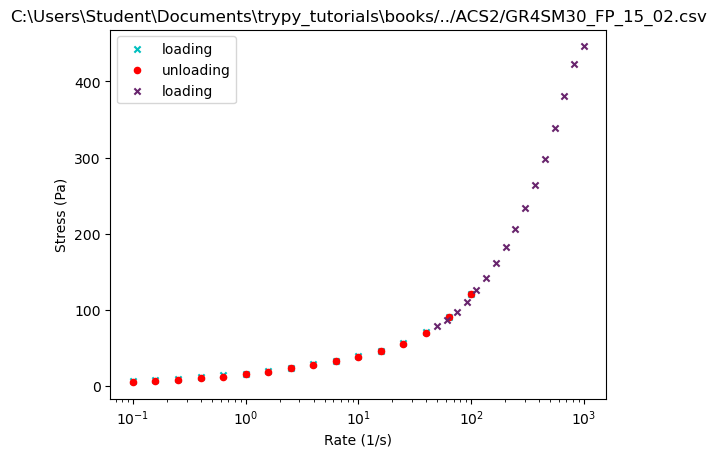

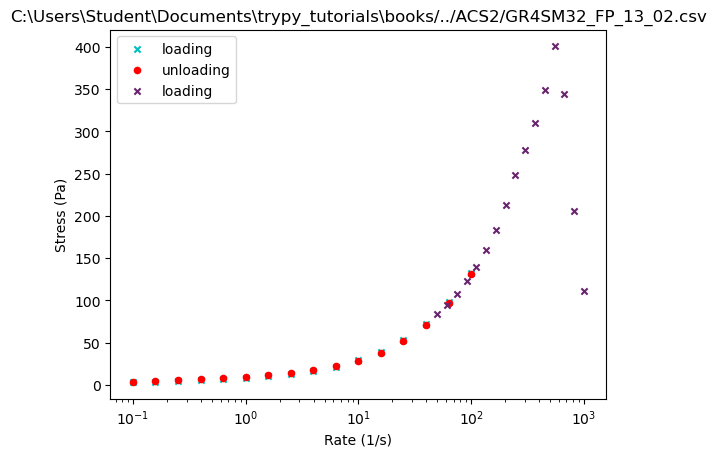

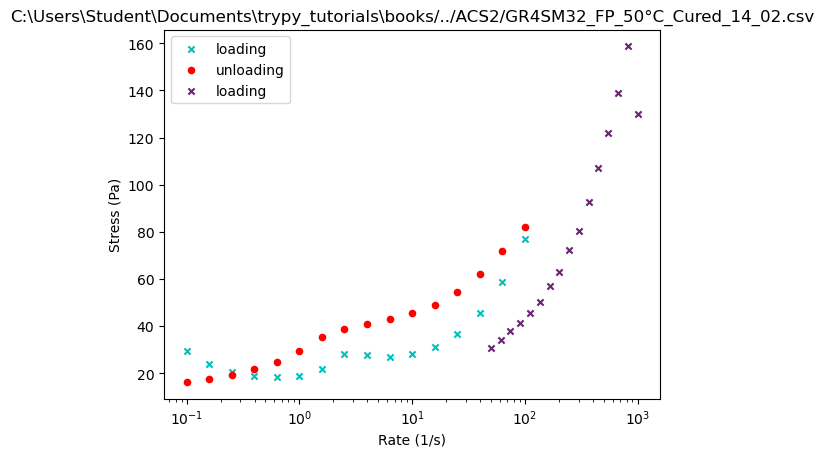

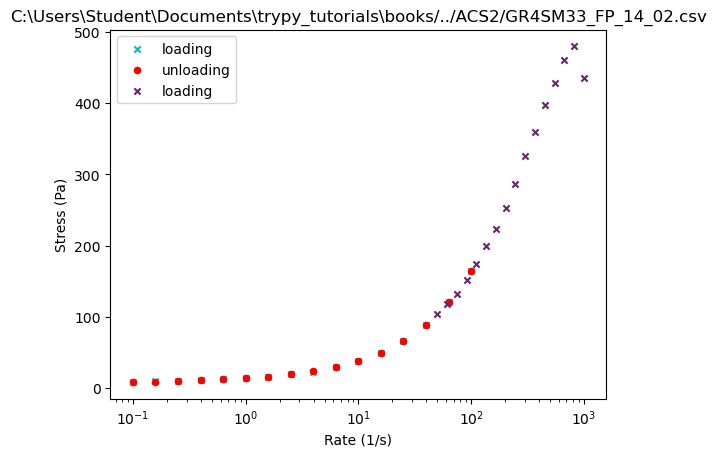

In [214]:
run() #tadah

In fact, I will go a step further and make those if statements a check function!

In [215]:
def check(file):
    if file[-4:]!='.csv' or file[0]!='G' or file=='GR4SM14__1000.csv':
        return True

Wonderful. But now I want to fit this data to something don't I?
Let's say I have some function and I just want to see if my data fits the theory. We can then loop over the relevant plots to check all my cases - left as an excercise to the reader  or not... Depends how I feel really.

Just a few notes here:
This is really where python shines and our work as scientists opens up
All of physics can be put down to the following and similar techniques in uncertainty quantification and demonstration

An all-you-need comprehensive textbook is Measurements and their Uncertainties by Hughes and Hayes

Now...
When we are doing our fitting, we are using a least squares regression model: the scipy optimisation function
We are not going to consider the final loading stage in our fit, just the initial loading data for the purposes of this exercise

In [227]:
import scipy.optimize as optimization #I hate the z too dw. Also, already imported at the top, but just for show here.

#Here we are fitting the herschel bulkley function to our data of stress against strain
def hb(x, n, k, y0):
    return y0 + k*x**n
#Our stress and strain values we'll take from GR4SM28.csv
filename='../ACS2/GR4SM28.csv'
df=load(filename)
stress=list(df["Stress (Pa)"].iloc[0:16])
stress=np.array(stress)
strain=list(df["Strain (%)"].iloc[0:16])
strain=np.array(strain)
#print(stress)
#We know our values should be something in the region of the following values... Make sure they're not terrible 1st guesses, think Newton-Raphson 
guess=np.array([1, 1, 100])
#We also know that our measurements have a 10% error on them:
stress_error=stress*0.1 #We dont care about strain :) Also, these errors are assumed to be normal, hence the 'sigma' notation
sigma=stress_error
L,M=optimization.curve_fit(hb, strain, stress, guess, sigma)

y0=L[0]
n=L[1]
k=L[2]
varn=M[0,0]
vark=M[1,1]
vary0=M[2,2]
print(filename+"\ny0="+str(round(y0,2))+"+-"+str(vary0))
print("k="+str(round(k,2))+"+-"+str(vark))
print("n="+str(round(n,2))+"+-"+str(varn))

"""
Please note we are converting our panda datafram columns to lists and then converting these lists to np arrays 
np arrays are superior. The rest of our plots will involve plotting these too...

Our brute force one has viscosity. I will not be doing that, but consider that an exercise. You have the skills you need now.
"""


../ACS2/GR4SM28.csv
y0=0.49+-1.670357817519856
k=69.78+-0.002684708117171961
n=0.23+-0.0002968164488557952


'\nPlease note we are converting our panda datafram columns to lists and then converting these lists to np arrays \nnp arrays are superior. The rest of our plots will involve plotting these too...\n\nOur brute force one has viscosity. I will not be doing that, but consider that an exercise. You have the skills you need now.\n'

Again, this works for one of our bois, so let's see if we can do it for a bunch of them...
Notice I specified filename and didn't just manually type it hehe

In [258]:
#Here we are fitting the herschel bulkley function to our data of stress against strain
def hb(x, n, k, y0):
    return y0 + k*x**n
def optimise(filename,SLICE1=0,SLICE2=16):
    """
    We are interested in the actual values of the coefficients
    So we will return these and not print them anymore :)
    """
    
    #Our stress and strain values we'll take from GR4SM28.csv

    df=load(filename)
    stress=list(df["Stress (Pa)"].iloc[SLICE1:SLICE2])
    stress=np.array(stress)
    strain=list(df["Strain (%)"].iloc[SLICE1:SLICE2])
    strain=np.array(strain)
    #print(stress)
    #We know our values should be something in the region of the following values... Make sure they're not terrible 1st guesses, think Newton-Raphson 
    guess=np.array([1, 1, 100])
    #We also know that our measurements have a 10% error on them:
    stress_error=stress*0.1 #We dont care about strain :) Also, these errors are assumed to be normal, hence the 'sigma' notation
    sigma=stress_error
    L,M=optimization.curve_fit(hb, strain, stress, guess, sigma)

    y0=L[0]
    n=L[1]
    k=L[2]
    varn=M[0,0]
    vark=M[1,1]
    vary0=M[2,2]
    return y0, vary0, k, vark, n, varn


In [259]:
#Check it works once
for file in filenames[:1]: #Nice little trick here to see if things work by slicing the whole array we care about:)
    if check(file):
        continue
    file=directory_my_files_are_in+file
    y0, vary0, k, vark, n, varn = optimise(file)
    print(file+"\ny0="+str(round(y0,2))+"+-"+str(vary0))
    print("k="+str(round(k,2))+"+-"+str(vark))
    print("n="+str(round(n,2))+"+-"+str(varn))

C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM14.csv
y0=0.64+-0.1410529792289182
k=7.33+-3.1080269042490794e-05
n=0.02+-0.0007307575535307627


In [260]:
#Now let's do it for all the files we care about. Good thing we made a check function...
#We already have the list of filenames from before too :)
for file in filenames:
    if check(file):
        continue
    file=directory_my_files_are_in+file
    y0, vary0, k, vark, n, varn = optimise(file)
    print(file+"\ny0="+str(round(y0,2))+"+-"+str(vary0))
    print("k="+str(round(k,2))+"+-"+str(vark))
    print("n="+str(round(n,2))+"+-"+str(varn))

C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM14.csv
y0=0.64+-0.1410529792289182
k=7.33+-3.1080269042490794e-05
n=0.02+-0.0007307575535307627
C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM15.csv
y0=0.67+-0.025701101799450114
k=5.25+-4.090162472098125e-06
n=0.01+-0.0001904404131815982
C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM16.csv
y0=0.62+-0.18946640086779803
k=7.61+-6.661364365667533e-05
n=0.02+-0.0007798826854185047
C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM17.csv
y0=0.74+-0.0201883902979413
k=6.97+-5.764172060552356e-07
n=0.0+-0.00018938541149856664
C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM18.csv
y0=0.65+-0.03205609691181623
k=6.78+-6.5000112614829245e-06
n=0.02+-0.00013996354077517925
C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM19.csv
y0=0.71+-0.0025614097360853604
k=2.78+-2.1927119308128207e-07
n=0.01+-4.9650452499498985e-05
C:\Users\Student\Documents\trypy_tutorials\boo

Okay, recap.  
We can load multiple raw data files and plot them.
We can optimise a fit according to raw data files.
Now we need to plot a fit and a raw data file together.
Let's start off by making a function that plots our optimised fit

In [267]:
def plotfit(y0,k,n,maxval,show=True):
    """
    Our function needs to take in our fit coefficients
    If we are plotting up to some maximum then we should include this too
    """
    strains=np.linspace(0,maxval,50000)
    stresses=hb(strains, y0, k, n)
    plt.plot(strains,stresses,c='k',label='fit')
    plt.legend()
    set_xscale='log'
    if True:
        plt.show()
#plotfit(8.59,0.01,0.72,1000)

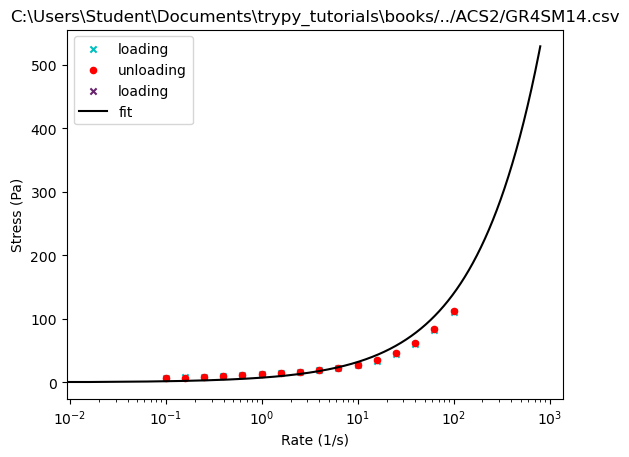

C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM14.csv
y0=0.64+-0.1410529792289182
k=7.33+-3.1080269042490794e-05
n=0.02+-0.0007307575535307627


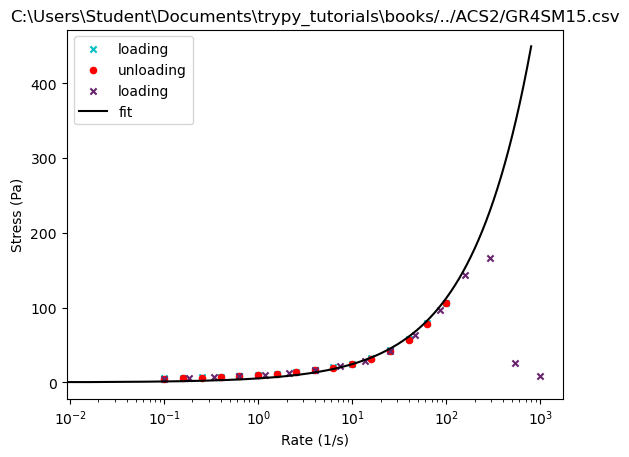

C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM15.csv
y0=0.67+-0.025701101799450114
k=5.25+-4.090162472098125e-06
n=0.01+-0.0001904404131815982


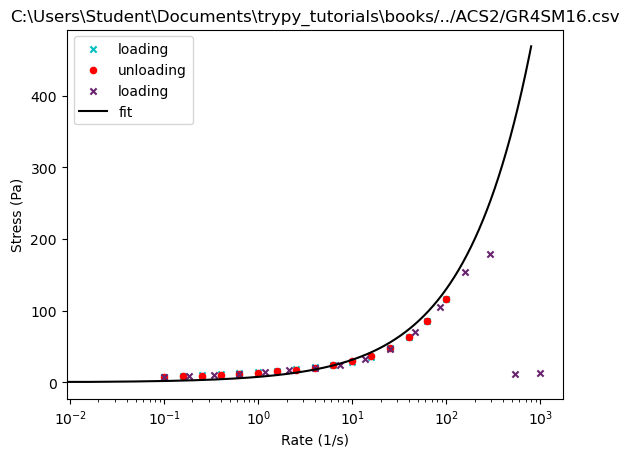

C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM16.csv
y0=0.62+-0.18946640086779803
k=7.61+-6.661364365667533e-05
n=0.02+-0.0007798826854185047


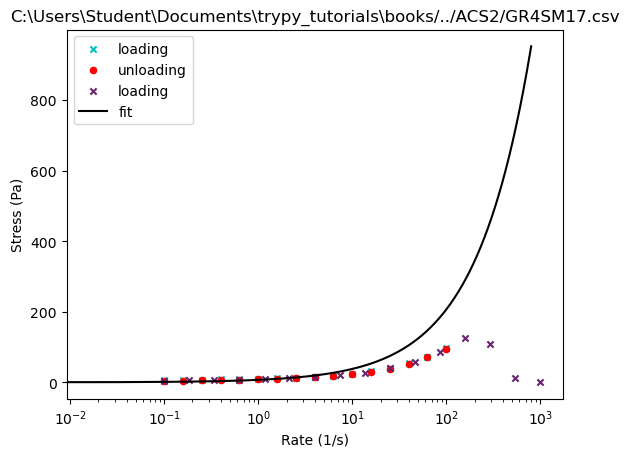

C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM17.csv
y0=0.74+-0.0201883902979413
k=6.97+-5.764172060552356e-07
n=0.0+-0.00018938541149856664


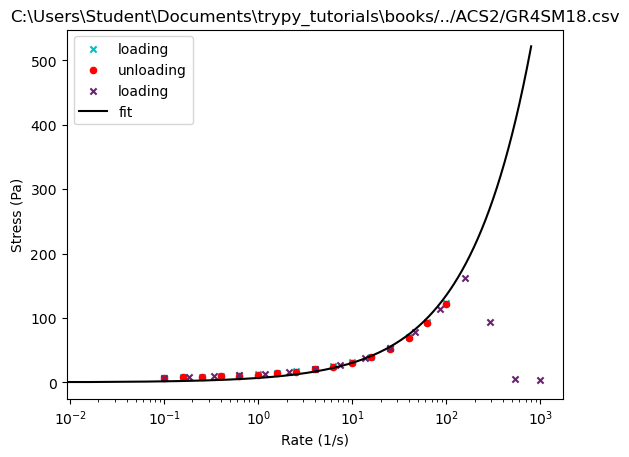

C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM18.csv
y0=0.65+-0.03205609691181623
k=6.78+-6.5000112614829245e-06
n=0.02+-0.00013996354077517925


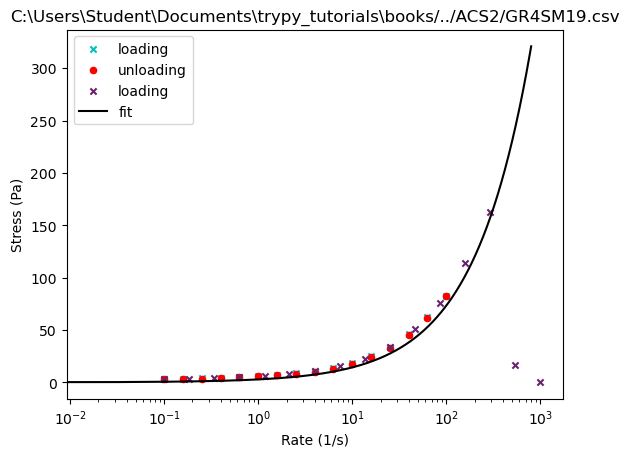

C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM19.csv
y0=0.71+-0.0025614097360853604
k=2.78+-2.1927119308128207e-07
n=0.01+-4.9650452499498985e-05


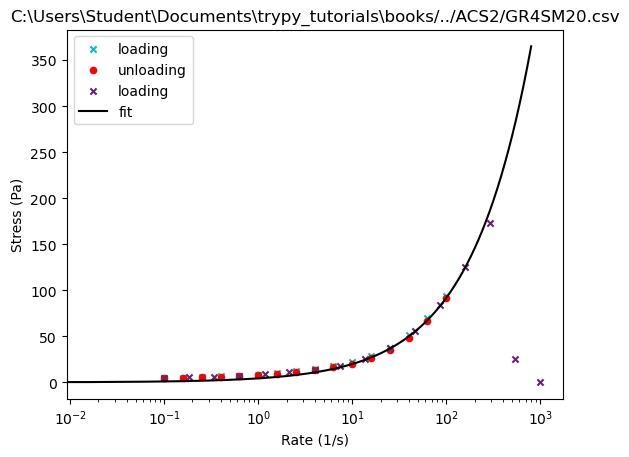

C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM20.csv
y0=0.66+-0.012862394546033041
k=4.3+-2.204420516326982e-06
n=0.01+-0.0001248039948275938


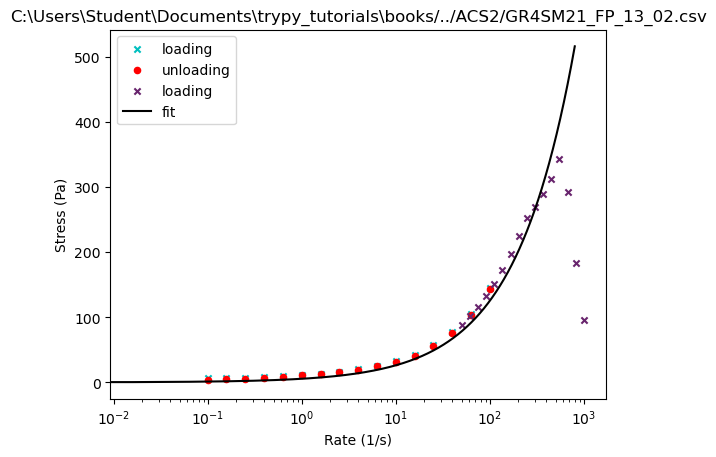

C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM21_FP_13_02.csv
y0=0.68+-0.011785823274050118
k=5.46+-1.663513319483472e-06
n=0.01+-6.0440786527848795e-05


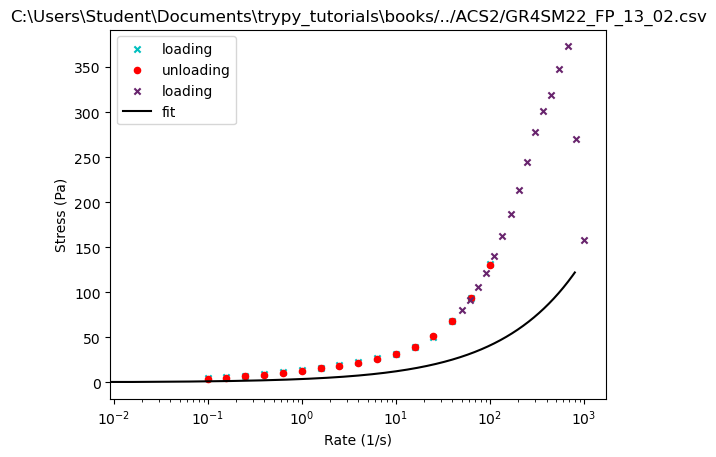

C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM22_FP_13_02.csv
y0=0.53+-0.2766023985996433
k=3.64+-0.000779152920274348
n=0.09+-0.0006989448841996829


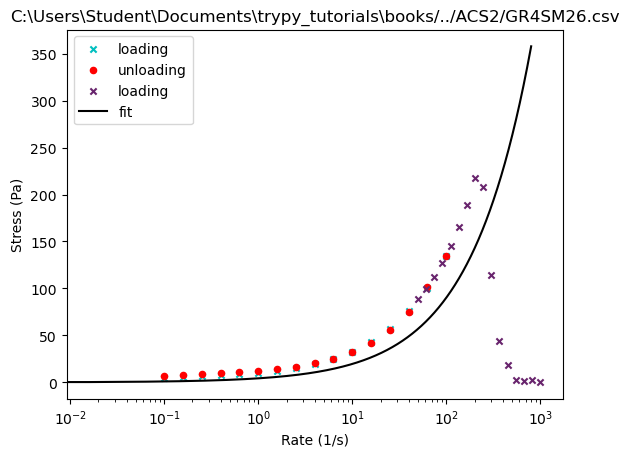

C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM26.csv
y0=0.66+-0.0021059717705960096
k=4.24+-4.653024964648028e-07
n=0.02+-1.1405006780801162e-05


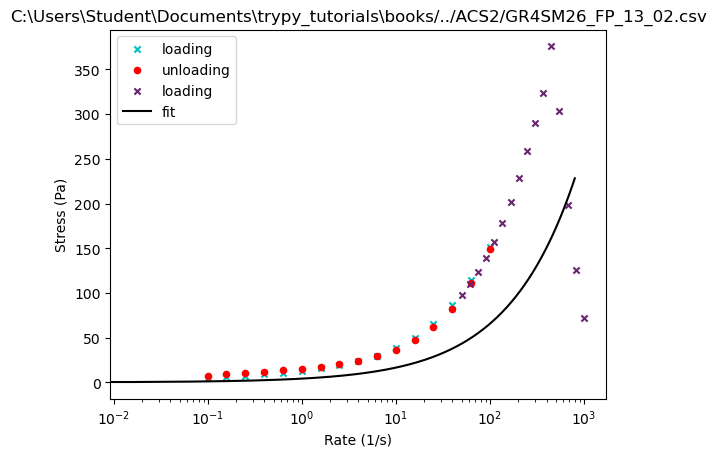

C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM26_FP_13_02.csv
y0=0.6+-0.039458328380684644
k=4.13+-3.136574514278725e-05
n=0.04+-0.00012014866476977498


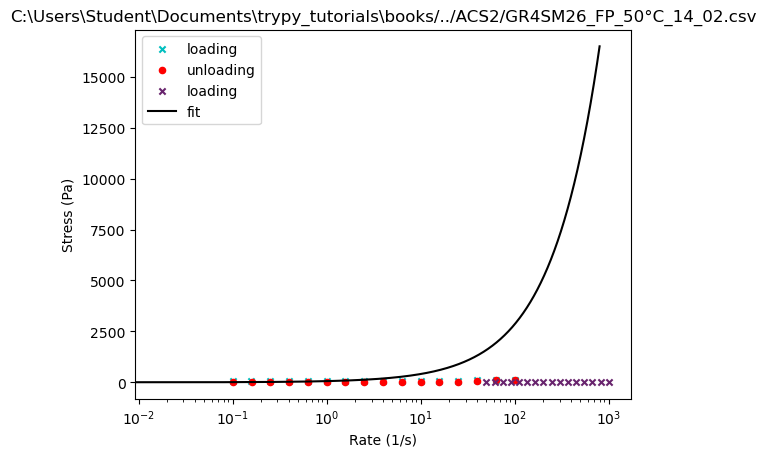

C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM26_FP_50°C_14_02.csv
y0=0.84+-4.583563488050525
k=58.43+-2.9562495702515775e-06
n=0.0+-0.02585555993942414


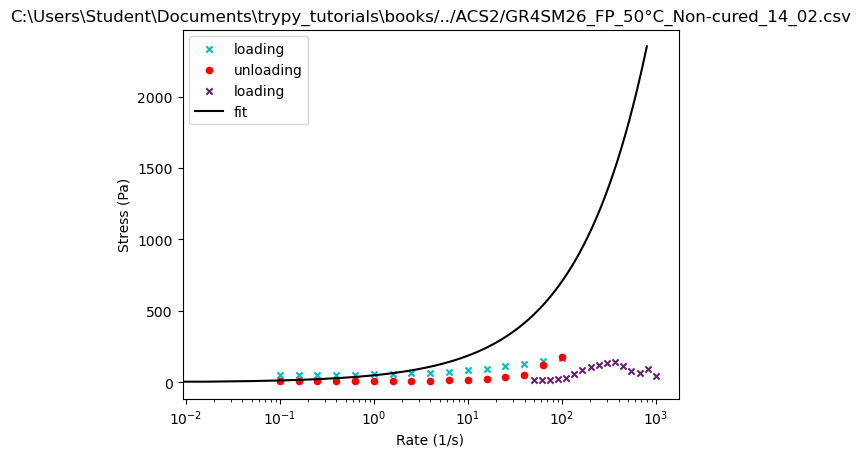

C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM26_FP_50°C_Non-cured_14_02.csv
y0=0.58+-1.4347478235436681
k=49.22+-0.0004212450872247844
n=0.05+-0.0009386112962757528


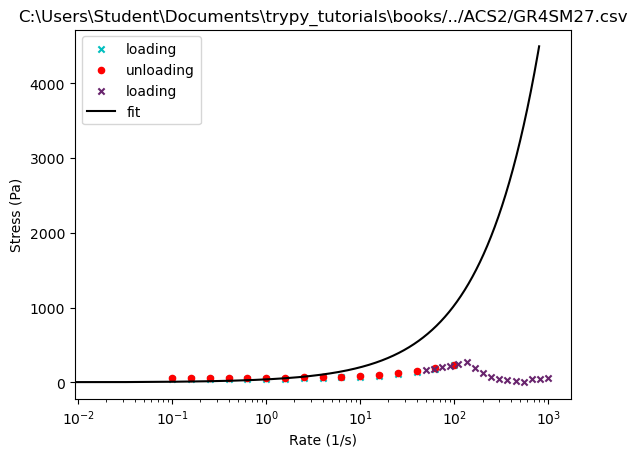

C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM27.csv
y0=0.71+-0.027382882242266537
k=39.33+-7.263317177172658e-07
n=0.01+-2.6122630440949487e-05


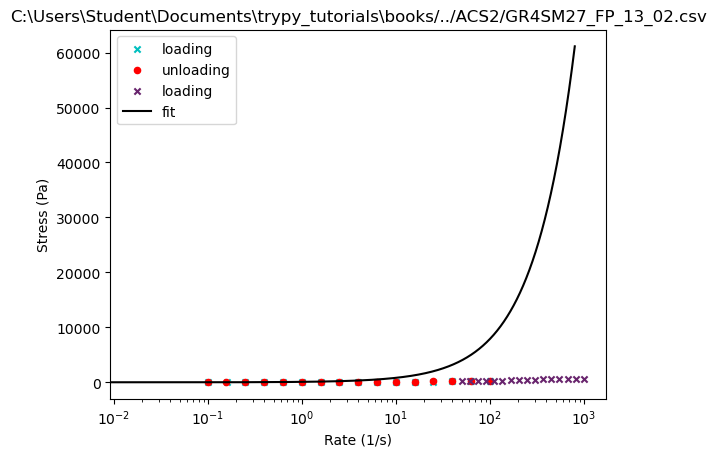

C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM27_FP_13_02.csv
y0=0.99+-0.21655312100380403
k=84.44+-6.931213057717659e-09
n=0.0+-0.00047497393752343666


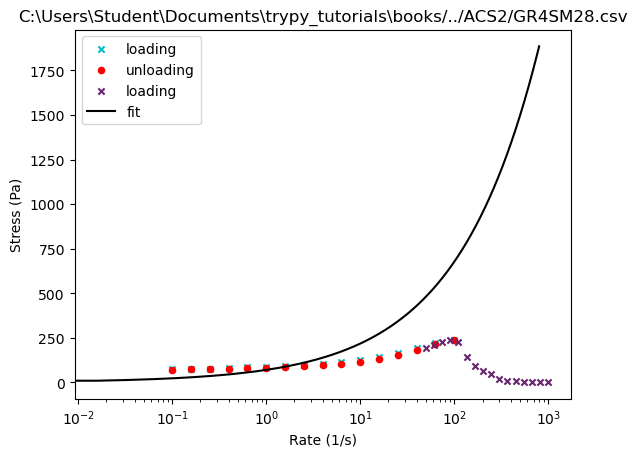

C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM28.csv
y0=0.49+-1.670357817519856
k=69.78+-0.002684708117171961
n=0.23+-0.0002968164488557952


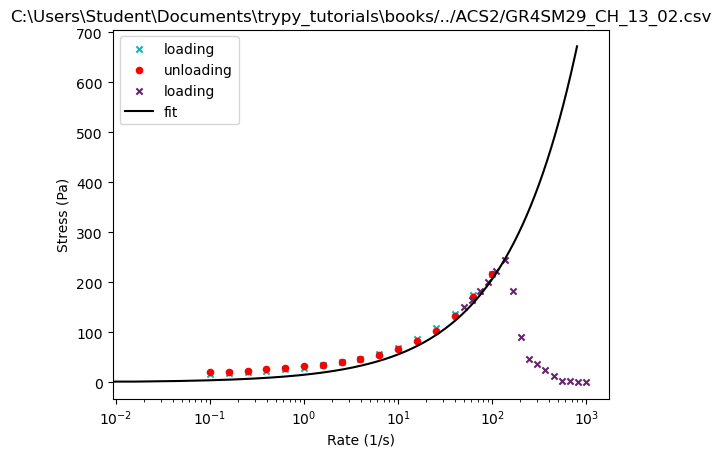

C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM29_CH_13_02.csv
y0=0.57+-0.012164013044434633
k=15.1+-1.0113599963995773e-05
n=0.1+-7.31252805116e-06


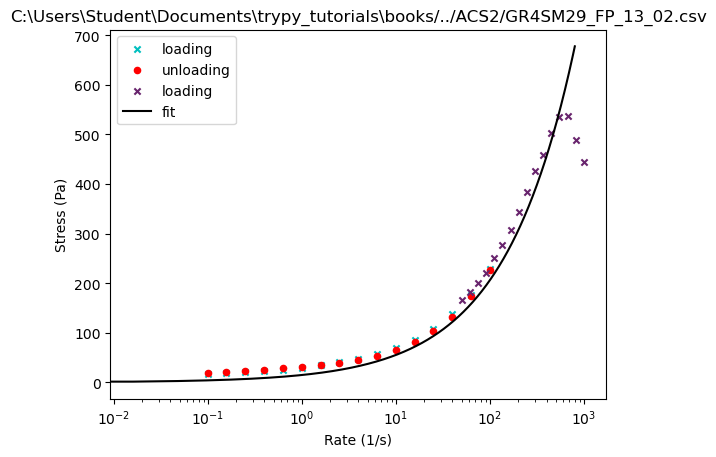

C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM29_FP_13_02.csv
y0=0.57+-0.04127844207461871
k=14.76+-3.2712147703251215e-05
n=0.09+-2.575496775003971e-05


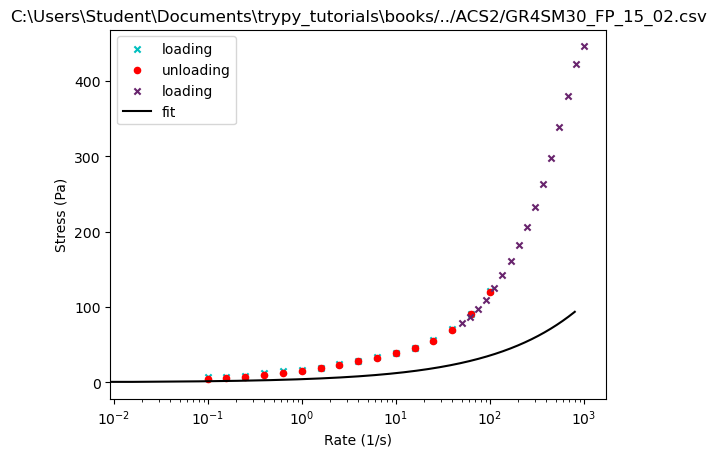

C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM30_FP_15_02.csv
y0=0.47+-0.3300865292623166
k=4.17+-0.0021232289153066343
n=0.2+-0.0003630632679945965


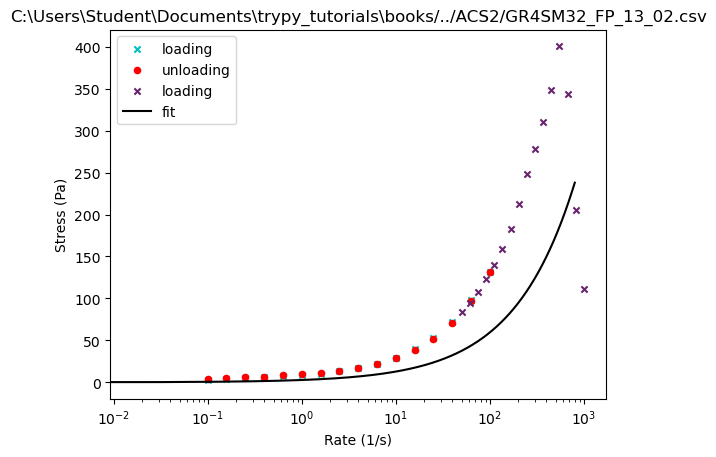

C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM32_FP_13_02.csv
y0=0.67+-0.009567892789901427
k=2.76+-2.6623421386568127e-06
n=0.02+-7.811246707825062e-05


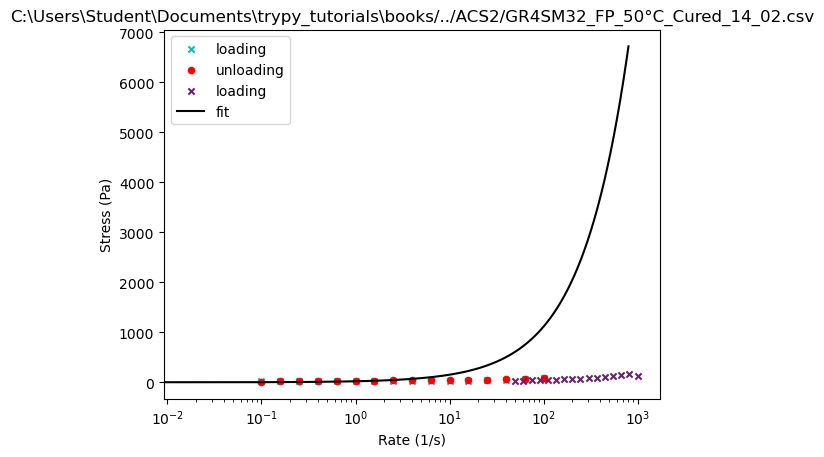

C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM32_FP_50°C_Cured_14_02.csv
y0=0.86+-1.4845285536155146
k=20.83+-9.064051822887669e-07
n=0.0+-0.02397641535547209


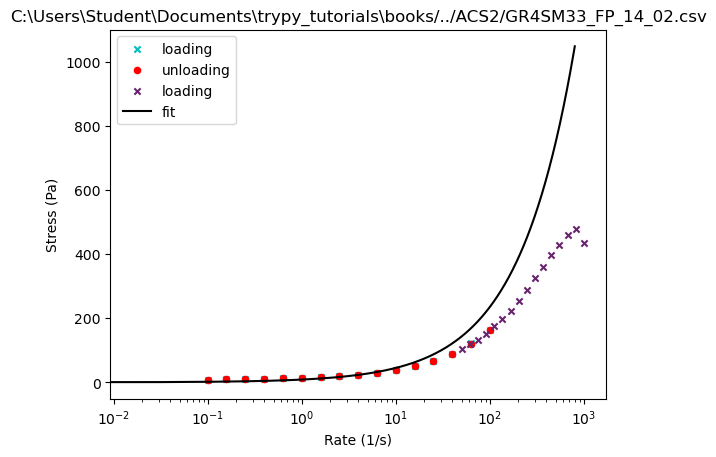

C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM33_FP_14_02.csv
y0=0.72+-0.012547625968992475
k=8.59+-6.550397252348743e-07
n=0.01+-4.880281535249305e-05


In [268]:
for file in filenames:
    if check(file):
        continue
    file=directory_my_files_are_in+file
    plotcsv(file,show=False)
    y0, vary0, k, vark, n, varn = optimise(file)
    plotfit(y0,k,n,800,show=True)
    print(file+"\ny0="+str(round(y0,2))+"+-"+str(vary0))
    print("k="+str(round(k,2))+"+-"+str(vark))
    print("n="+str(round(n,2))+"+-"+str(varn))

What do we notice?
Some are good and some are a bit shit. Probably because our errors should be bigger, we've guessed badly or something else has happened. It doesn't really matter for this, but this is where you have to look at each one independently and try and find your errors. Also, remember, here we only cared about our first 0:16 data points for fitting. In the other notebook this may have been different. Otherwise, that's pretty much that. We can mess around with legends and things, but honestly, at this point it just gets a bit tedious and random. We've done the hard part. Adios.

Optimal parameters not found: Number of calls to function has reached maxfev = 800.
C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM14.csv
Optimal parameters not found: Number of calls to function has reached maxfev = 800.
C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM15.csv
Optimal parameters not found: Number of calls to function has reached maxfev = 800.
C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM16.csv
Optimal parameters not found: Number of calls to function has reached maxfev = 800.
C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM17.csv
Optimal parameters not found: Number of calls to function has reached maxfev = 800.
C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM18.csv
Optimal parameters not found: Number of calls to function has reached maxfev = 800.
C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM19.csv
Optimal parameters not found: Number of calls to function has reached maxfev = 800

C:\Users\Student\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


Optimal parameters not found: Number of calls to function has reached maxfev = 800.
C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM32_FP_50°C_Cured_14_02.csv
Optimal parameters not found: Number of calls to function has reached maxfev = 800.
C:\Users\Student\Documents\trypy_tutorials\books/../ACS2/GR4SM33_FP_14_02.csv


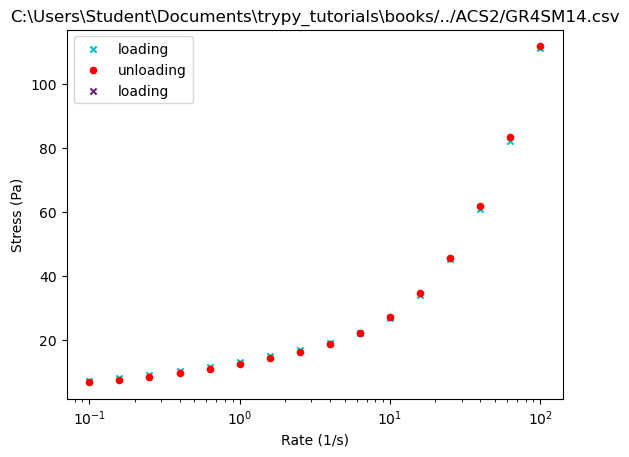

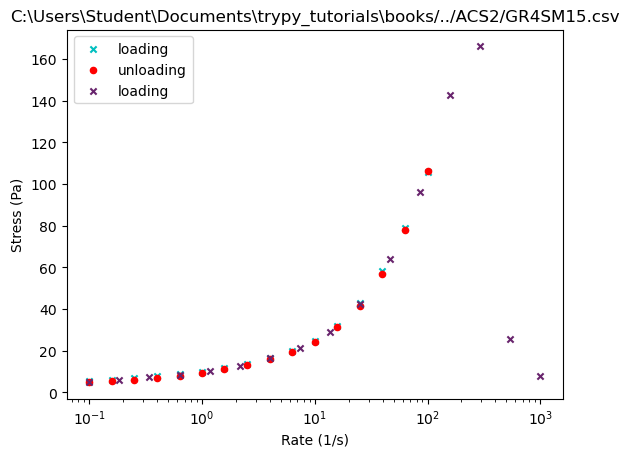

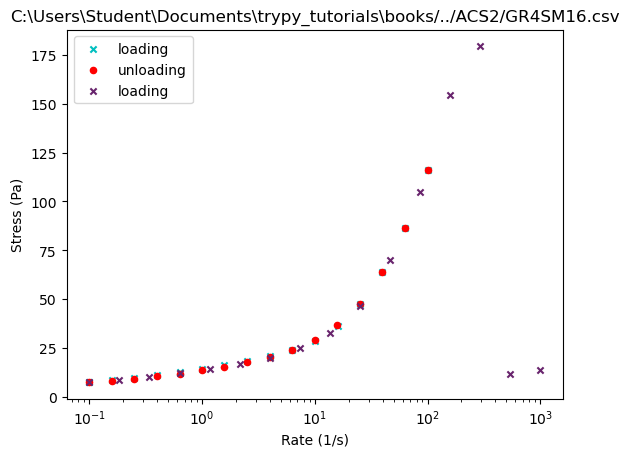

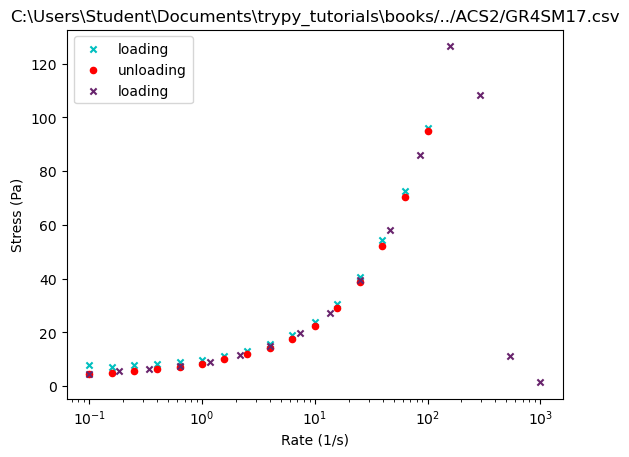

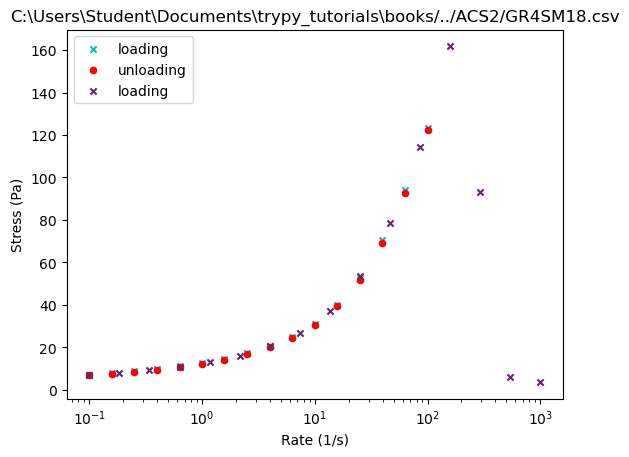

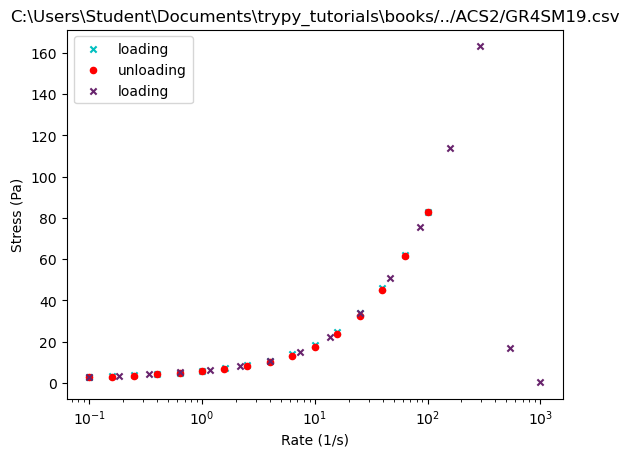

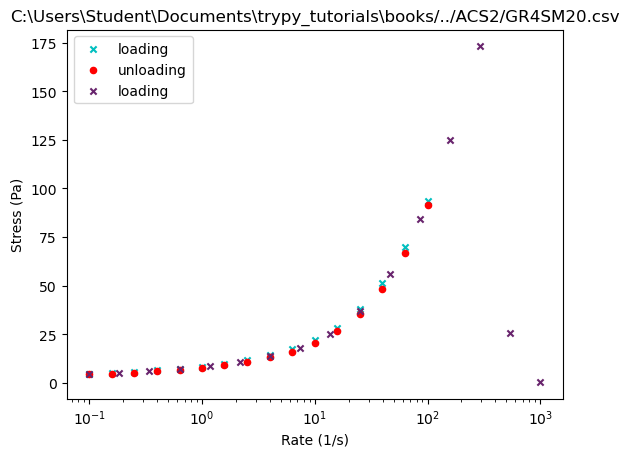

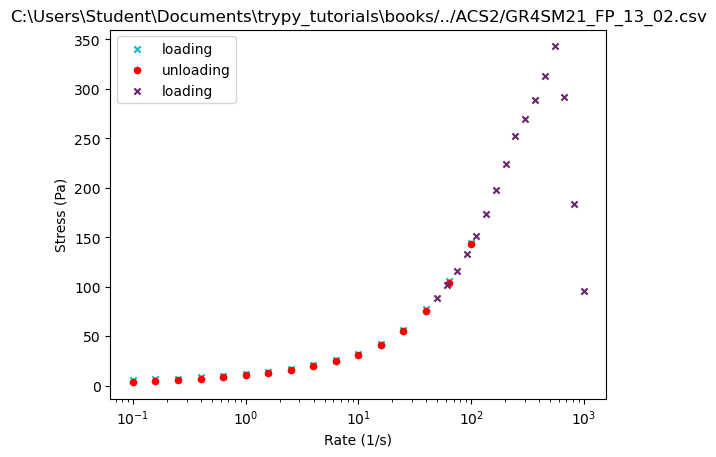

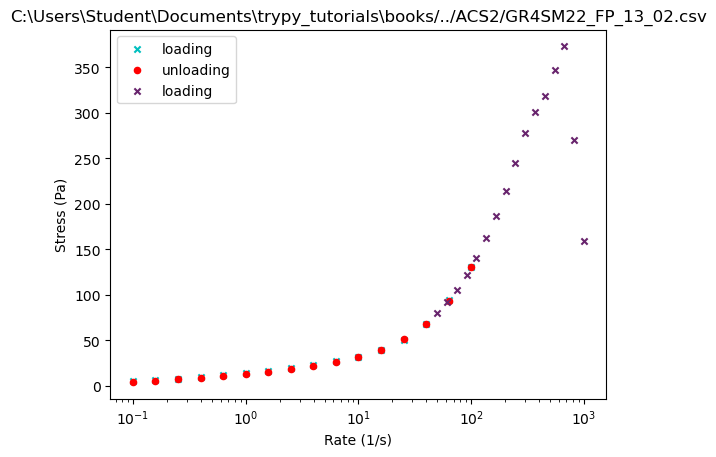

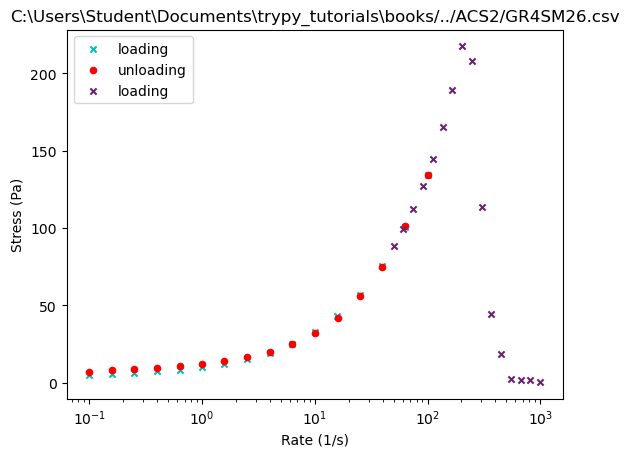

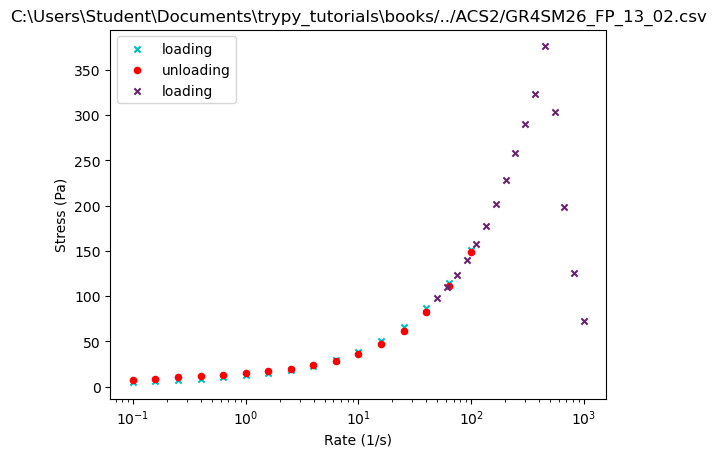

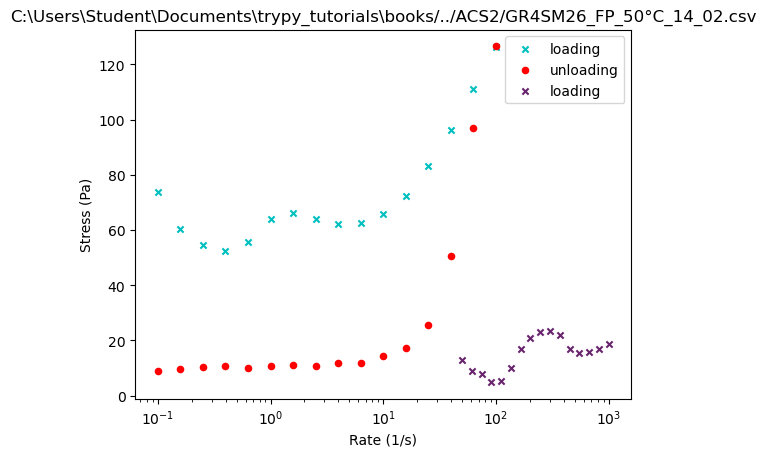

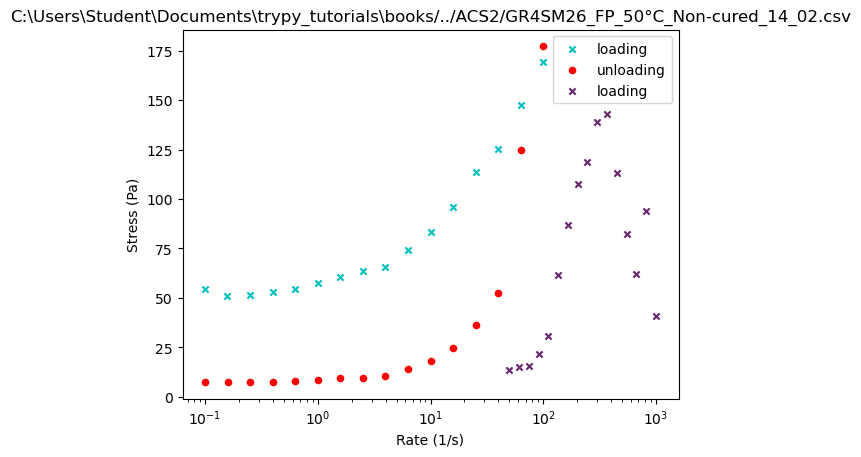

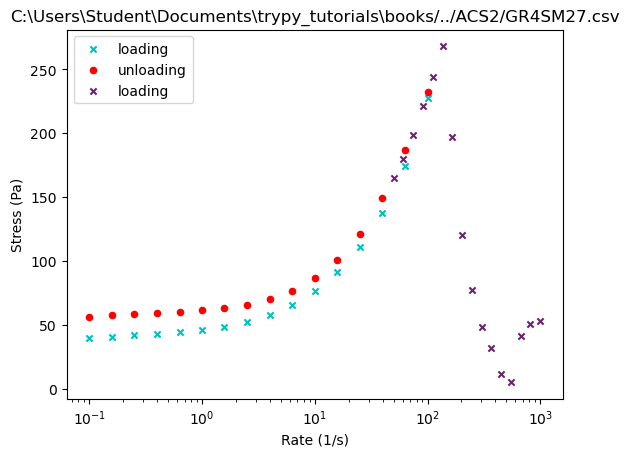

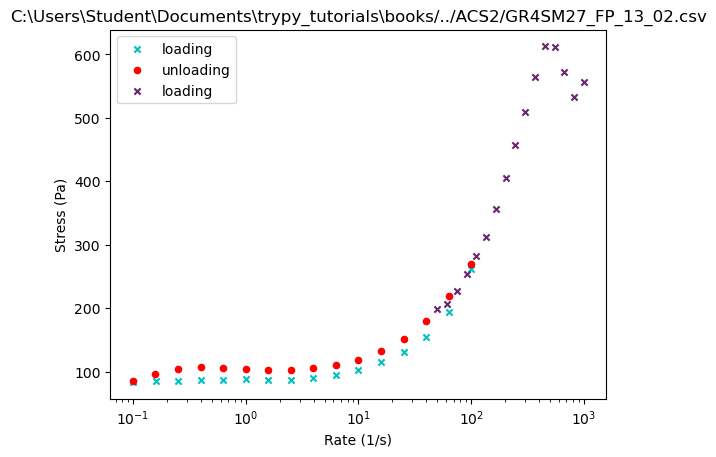

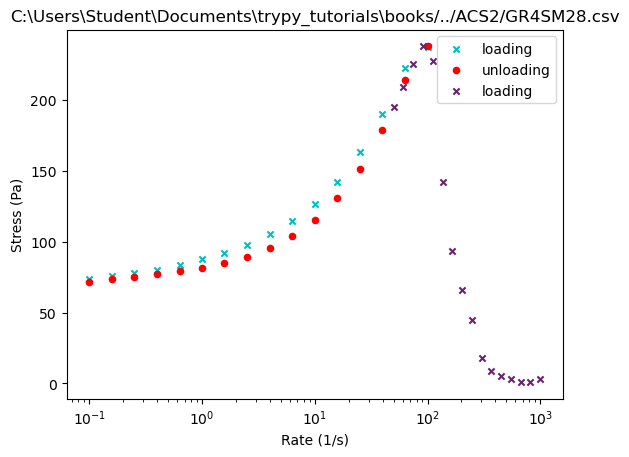

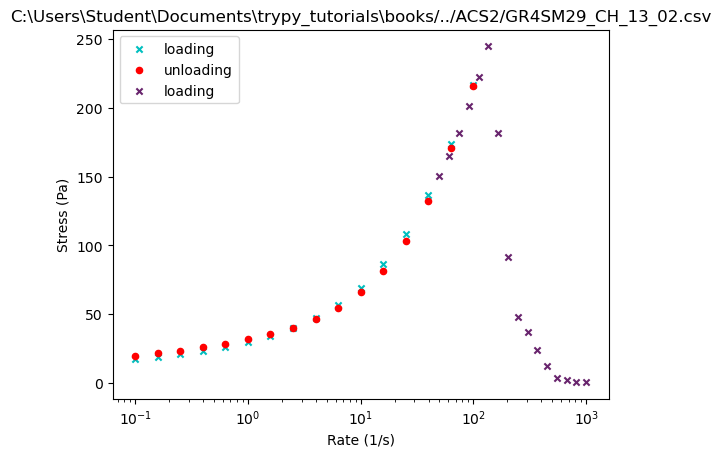

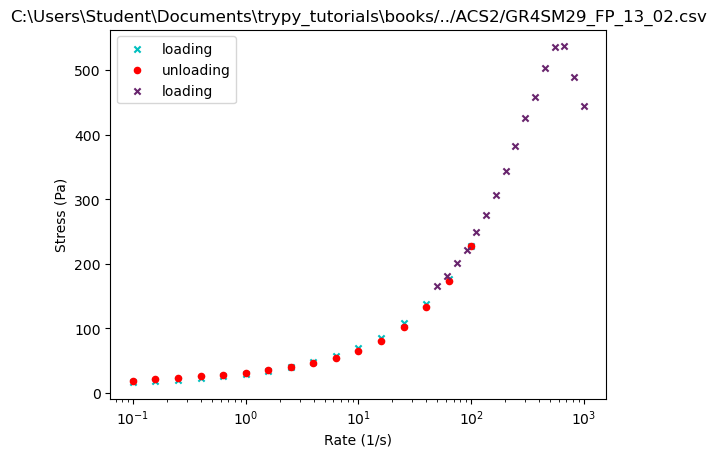

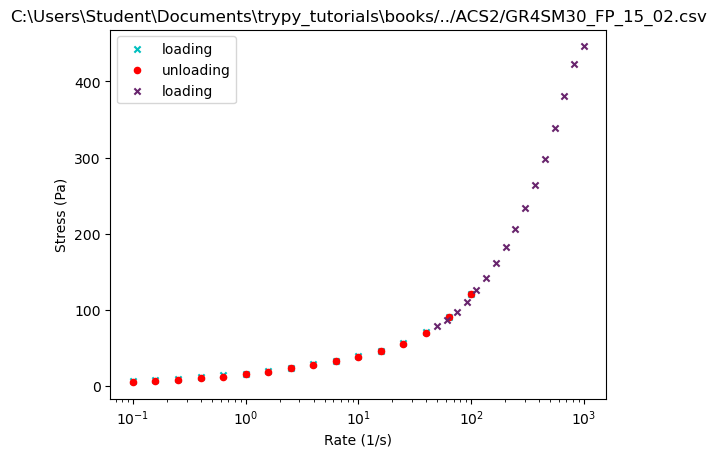

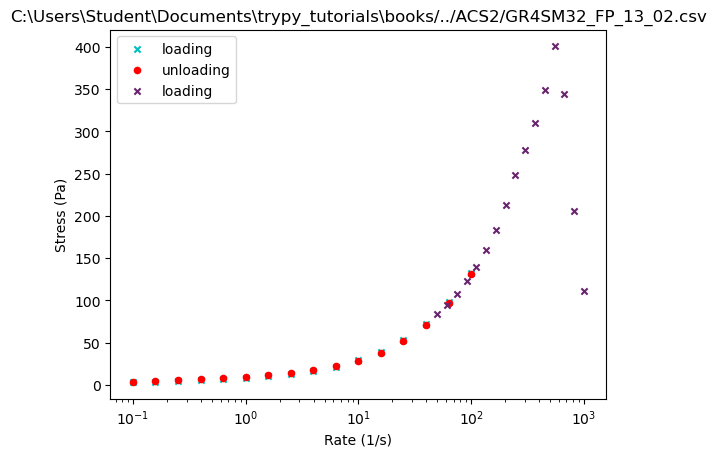

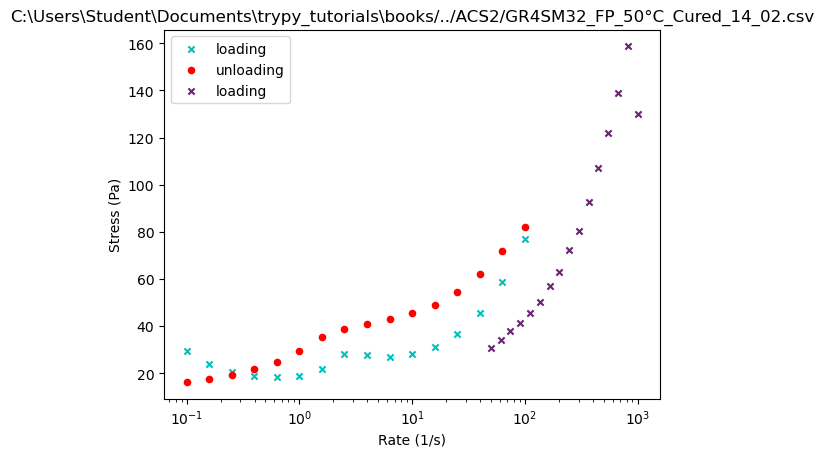

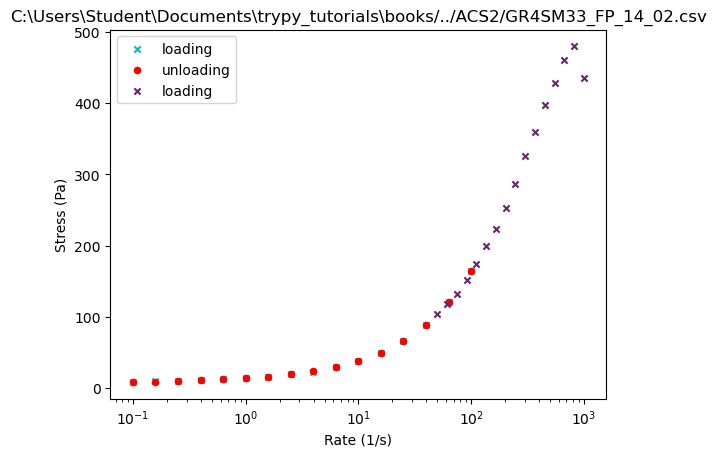

In [264]:
#Let's say we keep running into errors though... Let's idedntify problematic bois and kee pthe good ones anyway :)
for file in filenames:
    try:
        if check(file):
            continue
        file=directory_my_files_are_in+file
        plotcsv(file,show=False)
        y0, vary0, k, vark, n, varn = optimise(file,SLICE1=16,SLICE2=32)
        plotfit(y0,k,n,800,show=True)
        print(file+"\ny0="+str(round(y0,2))+"+-"+str(vary0))
        print("k="+str(round(k,2))+"+-"+str(vark))
        print("n="+str(round(n,2))+"+-"+str(varn))
    except Exception as e:
        print(e)
        print(file)

#Turns out they're all dodgy
#I apologise for breaking your computer, but let this be a lesson in whaat not to do
#Always check and things. Fitting is the hardest part of the journey. Anyways. You may as well mess around with making your plots look good below. HAVE FUN :)